
# Exploratory Data Analyses of Covid Data (27/07/2020)


Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. 
SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contagious virus which is believed to have started at a fish market in the chinease city of  Wuhan in December 2019. This disease was later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 24 July 2020), this leads to a total of 600K+ Deaths across the globe.
The spread of this virus is currently accelerating globaly; and it is of ultimate importance to better undersand its behaviour.

In this notebook I focus on analyzing covid data obtained from the [our world in data](https://ourworldindata.org/coronavirus-source-data) and [world o meters](https://www.worldometers.info/coronavirus/) websites, in an effort to better understand the main factors that drive the spread of Covid.

In [1]:
import pandas as pd

import sys

import csv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import plotly

import plotly.express as px

import bokeh

from datetime import date,datetime, timedelta

import dateutil.relativedelta

from matplotlib import dates as mpl_dates

from matplotlib.animation import FuncAnimation

In [2]:
pd.set_option("display.max_columns", 110)
pd.set_option("display.max_rows", 100)

In [3]:
df = pd.read_csv("owid-covid-data.csv", parse_dates=True)

C:\Users\enriq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(32787, 34)

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   total_deaths_per_million  new_deaths_per_million  new_tests  total_tests  \
0                       0.0                     0.0        NaN          NaN   
1                       0.0                     0.0        NaN          NaN   
2                       0.0                     0.0        NaN          NaN   
3                       0.0                     0.0        NaN          NaN   
4                       0.0                     0.0        NaN          NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_thousand tests_units  stringency_index  population  \
0                              NaN         NaN               NaN  38928341.0   
1                              NaN         NaN               0.0  38928341.0   
2                              NaN         NaN               0.0  38928341.0   
3                              NaN         NaN               0.0  38928341.0   
4                              NaN         NaN               0.0  38928341.0   

   population_density  median_age  aged_65_older  aged_70_older  \
0              54.422        18.6          2.581          1.337   
1              54.422        18.6          2.581          1.337   
2              54.422        18.6          2.581          1.337   
3              54.422        18.6          2.581          1.337   
4              54.422        18.6          2.581          1.337   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  
0                         0.5            64.83  
1                         0.5            64.83  
2                         0.5            64.83  
3                         0.5            64.83  
4                         0.5            64.83

In [6]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d") 

In [7]:
df["perc_death/cases"] = (df["total_deaths"]/df["total_cases"])*100

In [8]:
df.isna().sum()

iso_code                              64
continent                            273
location                               0
date                                   0
total_cases                          355
new_cases                            355
total_deaths                         355
new_deaths                           355
total_cases_per_million              419
new_cases_per_million                419
total_deaths_per_million             419
new_deaths_per_million               419
new_tests                          22386
total_tests                        22140
total_tests_per_thousand           22140
new_tests_per_thousand             22386
new_tests_smoothed                 21267
new_tests_smoothed_per_thousand    21267
tests_units                        20499
stringency_index                    6191
population                            64
population_density                  1474
median_age                          3271
aged_65_older                       3698
aged_70_older   

In [9]:
df.loc[df["perc_death/cases"].isnull(),"perc_death/cases"] = 0

In [10]:
df.describe()

total_cases      new_cases   total_deaths    new_deaths  \
count  3.243200e+04   32432.000000   32432.000000  32432.000000   
mean   4.885987e+04     987.796312    2585.733874     39.765170   
std    4.960050e+05    9100.800792   24623.120537    347.215162   
min    0.000000e+00  -29726.000000       0.000000  -1918.000000   
25%    2.000000e+01       0.000000       0.000000      0.000000   
50%    4.240000e+02       5.000000       8.000000      0.000000   
75%    4.809000e+03      98.000000     103.000000      2.000000   
max    1.601810e+07  282209.000000  644832.000000  10512.000000   

       total_cases_per_million  new_cases_per_million  \
count             32368.000000           32368.000000   
mean               1071.124733              17.606609   
std                2615.312986              62.948171   
min                   0.000000            -437.881000   
25%                   8.173750               0.000000   
50%                 146.528000               0.749000   
75%                 901.859000              10.271000   
max               37845.793000            4944.376000   

       total_deaths_per_million  new_deaths_per_million      new_tests  \
count              32368.000000            32368.000000   10401.000000   
mean                  40.085655                0.532930   16320.258341   
std                  122.198696                3.030342   59168.420750   
min                    0.000000              -41.023000   -3743.000000   
25%                    0.000000                0.000000     805.000000   
50%                    1.888000                0.000000    2766.000000   
75%                   20.667000                0.137000    9307.000000   
max                 1237.551000              200.040000  929838.000000   

        total_tests  total_tests_per_thousand  new_tests_per_thousand  \
count  1.064700e+04              10647.000000            10401.000000   
mean   7.689958e+05                 30.980448                0.572316   
std    3.022411e+06                 55.964699                1.104416   
min    1.000000e+00                  0.000000               -0.398000   
25%    2.585100e+04                  1.437000                0.049000   
50%    1.105140e+05                  8.105000                0.221000   
75%    4.324700e+05                 38.056000                0.693000   
max    5.063568e+07                638.167000               20.611000   

       new_tests_smoothed  new_tests_smoothed_per_thousand  stringency_index  \
count        11520.000000                     11520.000000      26596.000000   
mean         15589.503906                         0.551412         58.311618   
std          54168.666654                         0.979232         29.940275   
min              0.000000                         0.000000          0.000000   
25%            903.000000                         0.051000         37.960000   
50%           3115.000000                         0.239000         67.590000   
75%           9528.250000                         0.691000         81.940000   
max         801014.000000                        15.456000        100.000000   

         population  population_density    median_age  aged_65_older  \
count  3.272300e+04        31313.000000  29516.000000   29089.000000   
mean   9.482857e+07          369.357497     31.655201       9.462511   
std    6.385244e+08         1683.292940      9.010701       6.378540   
min    8.090000e+02            0.137000     15.100000       1.144000   
25%    1.701583e+06           39.497000     24.400000       3.655000   
50%    8.655541e+06           90.672000     31.800000       7.104000   
75%    3.236600e+07          222.873000     39.800000      14.864000   
max    7.794799e+09        19347.500000     48.200000      27.049000   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   29364.000000    29159.000000     19499.000000           29525.000000   
mean        5.998842    21589.03015

Lets use some histograms, boxplots and corr plots to get a feel of the data

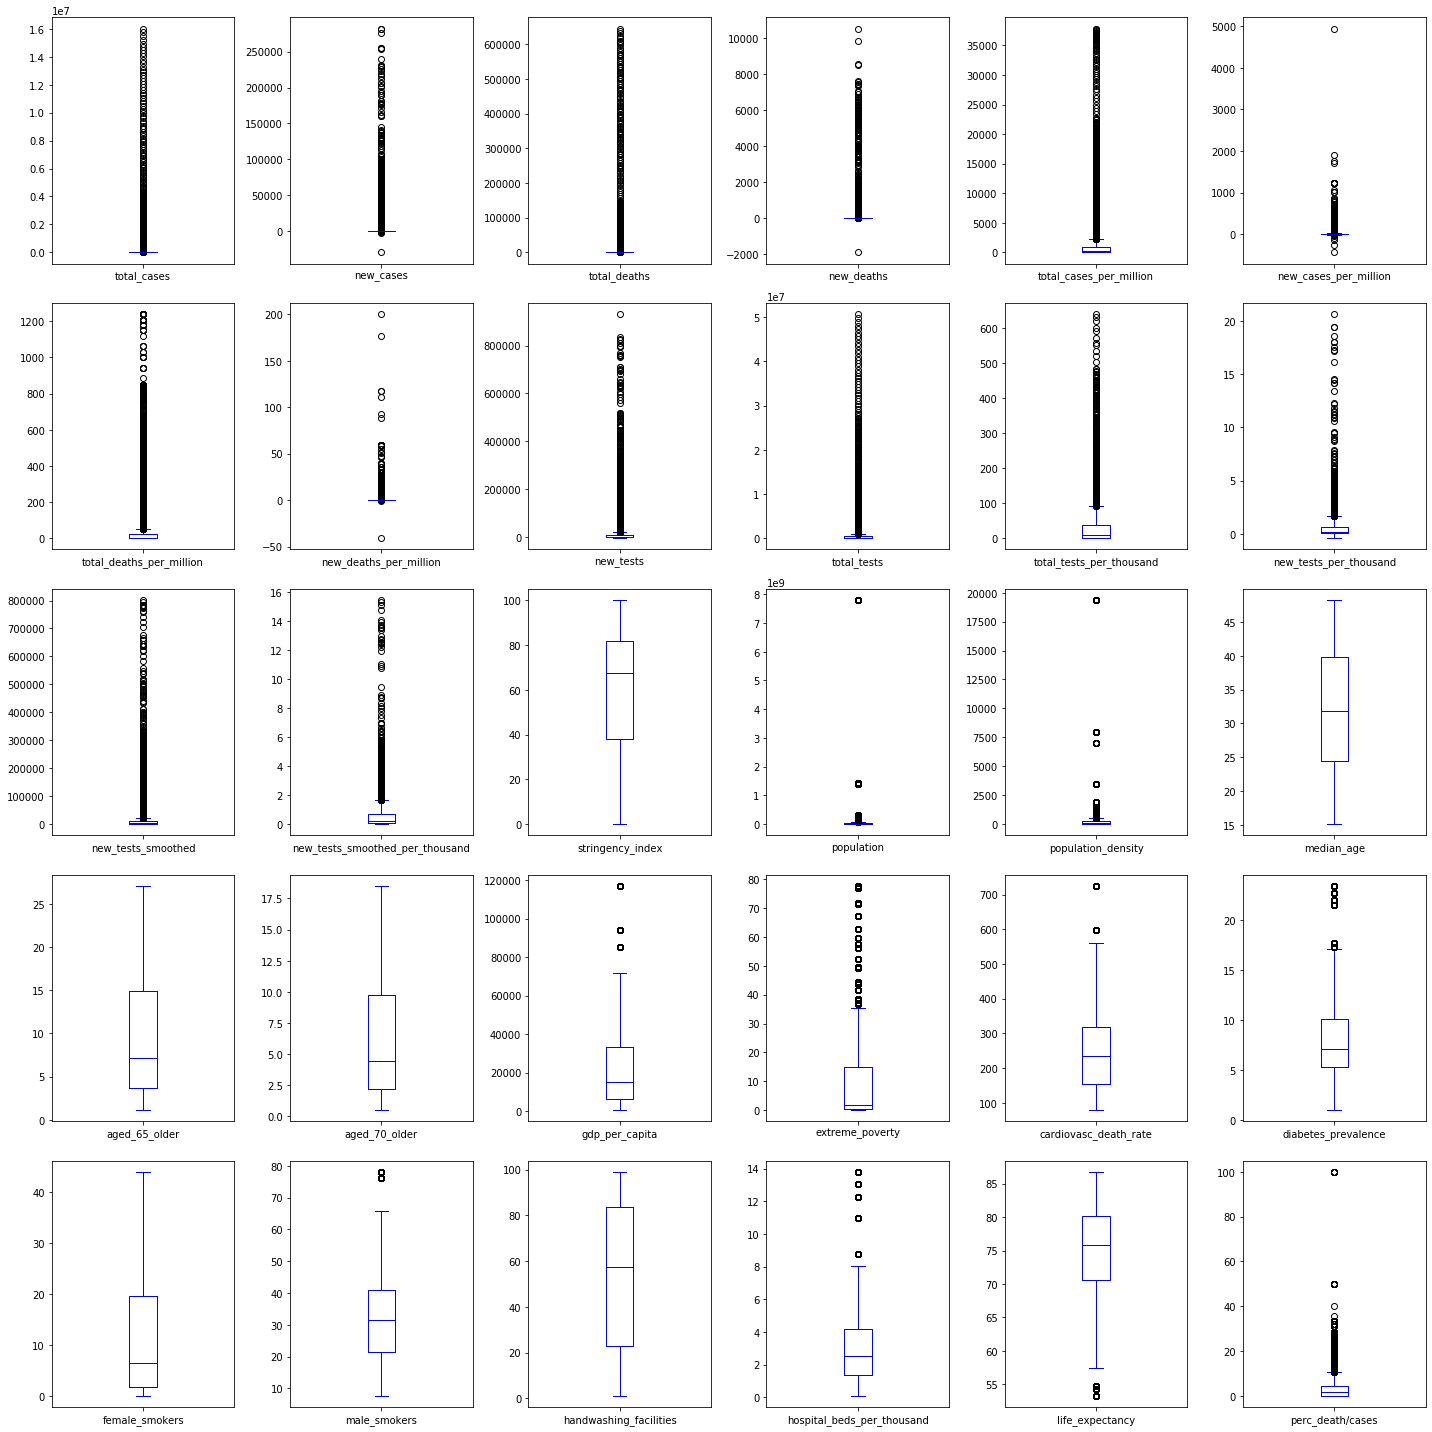

In [11]:
df.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False, figsize=(20,20), color="b")
plt.tight_layout()
plt.show()

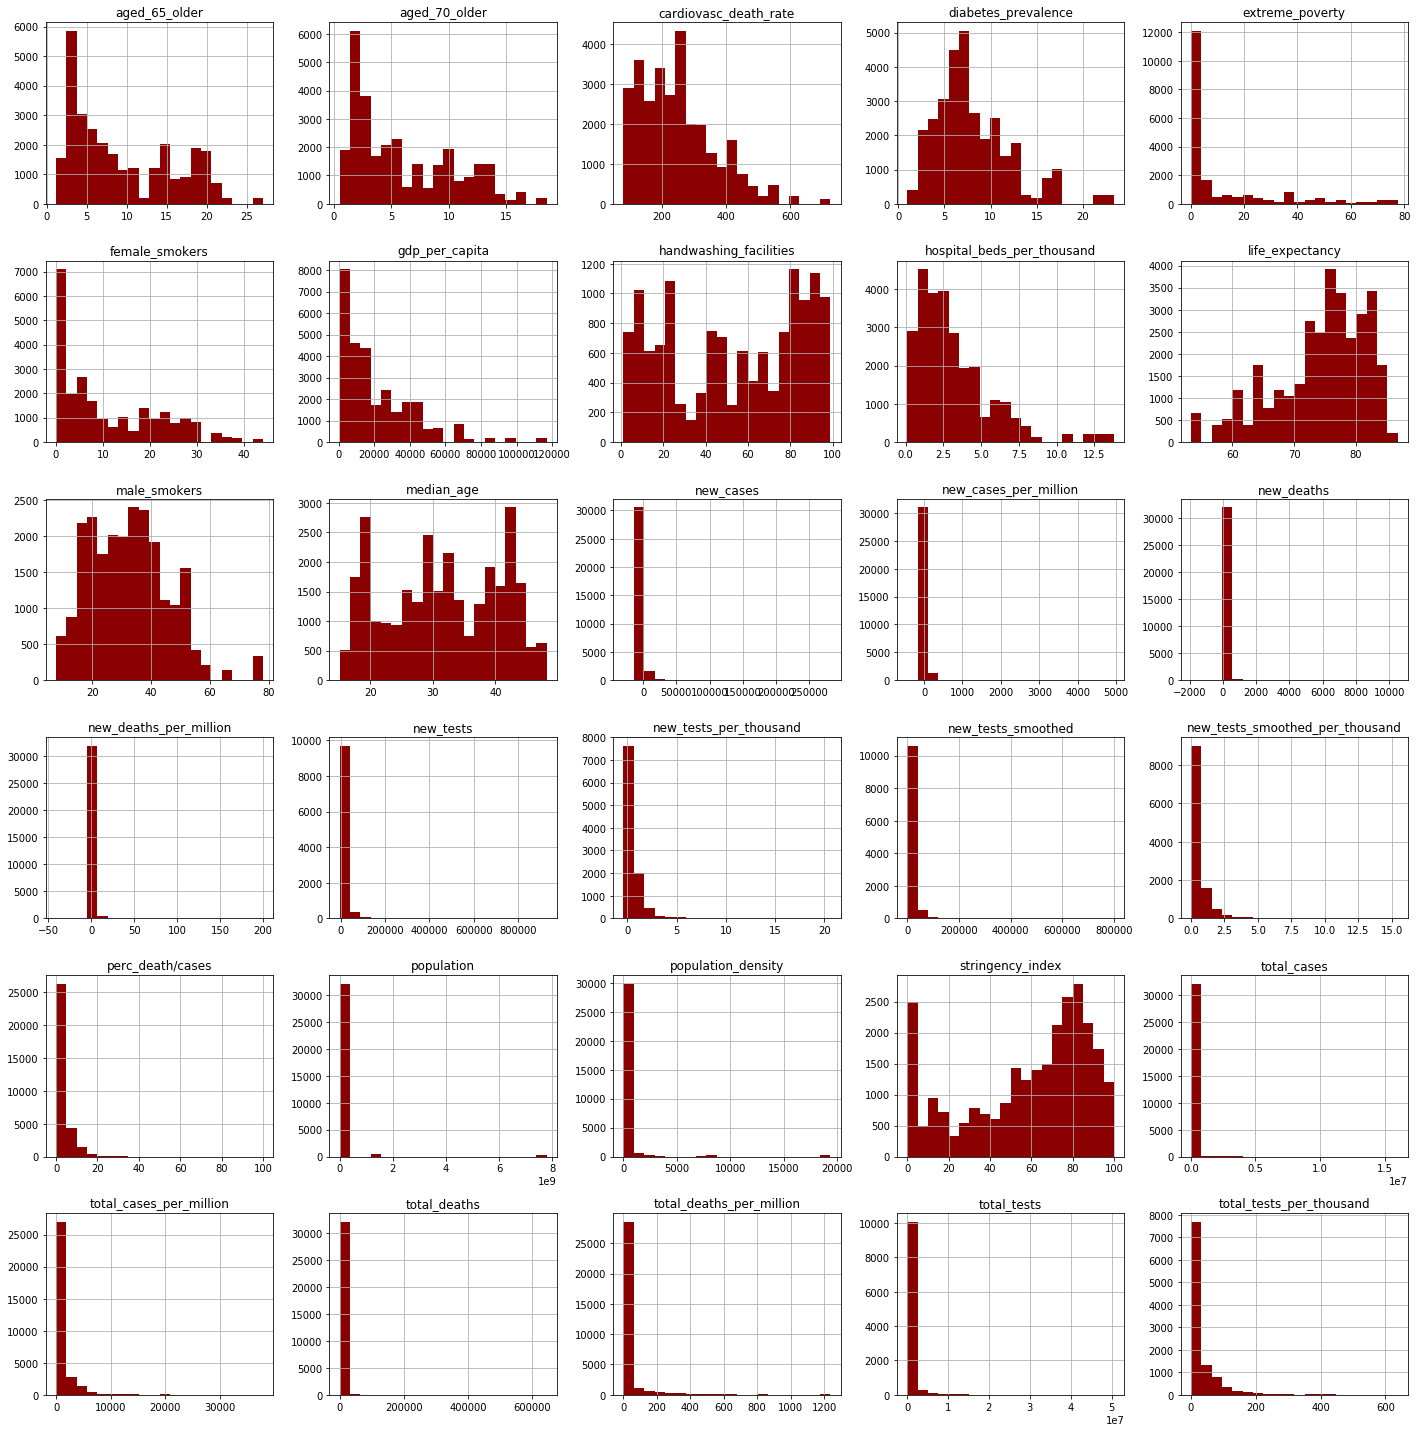

In [12]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist(color="darkred", bins=20)
plt.rcParams["figure.figsize"] = (30,30)
plt.tight_layout()
# plt.savefig("hist.png")
plt.show()

For example, we can see there is an important difference in the percentage of male smokers vs female smokers which partially explain why men may be more susceptible to coronavirus

Variable correlation

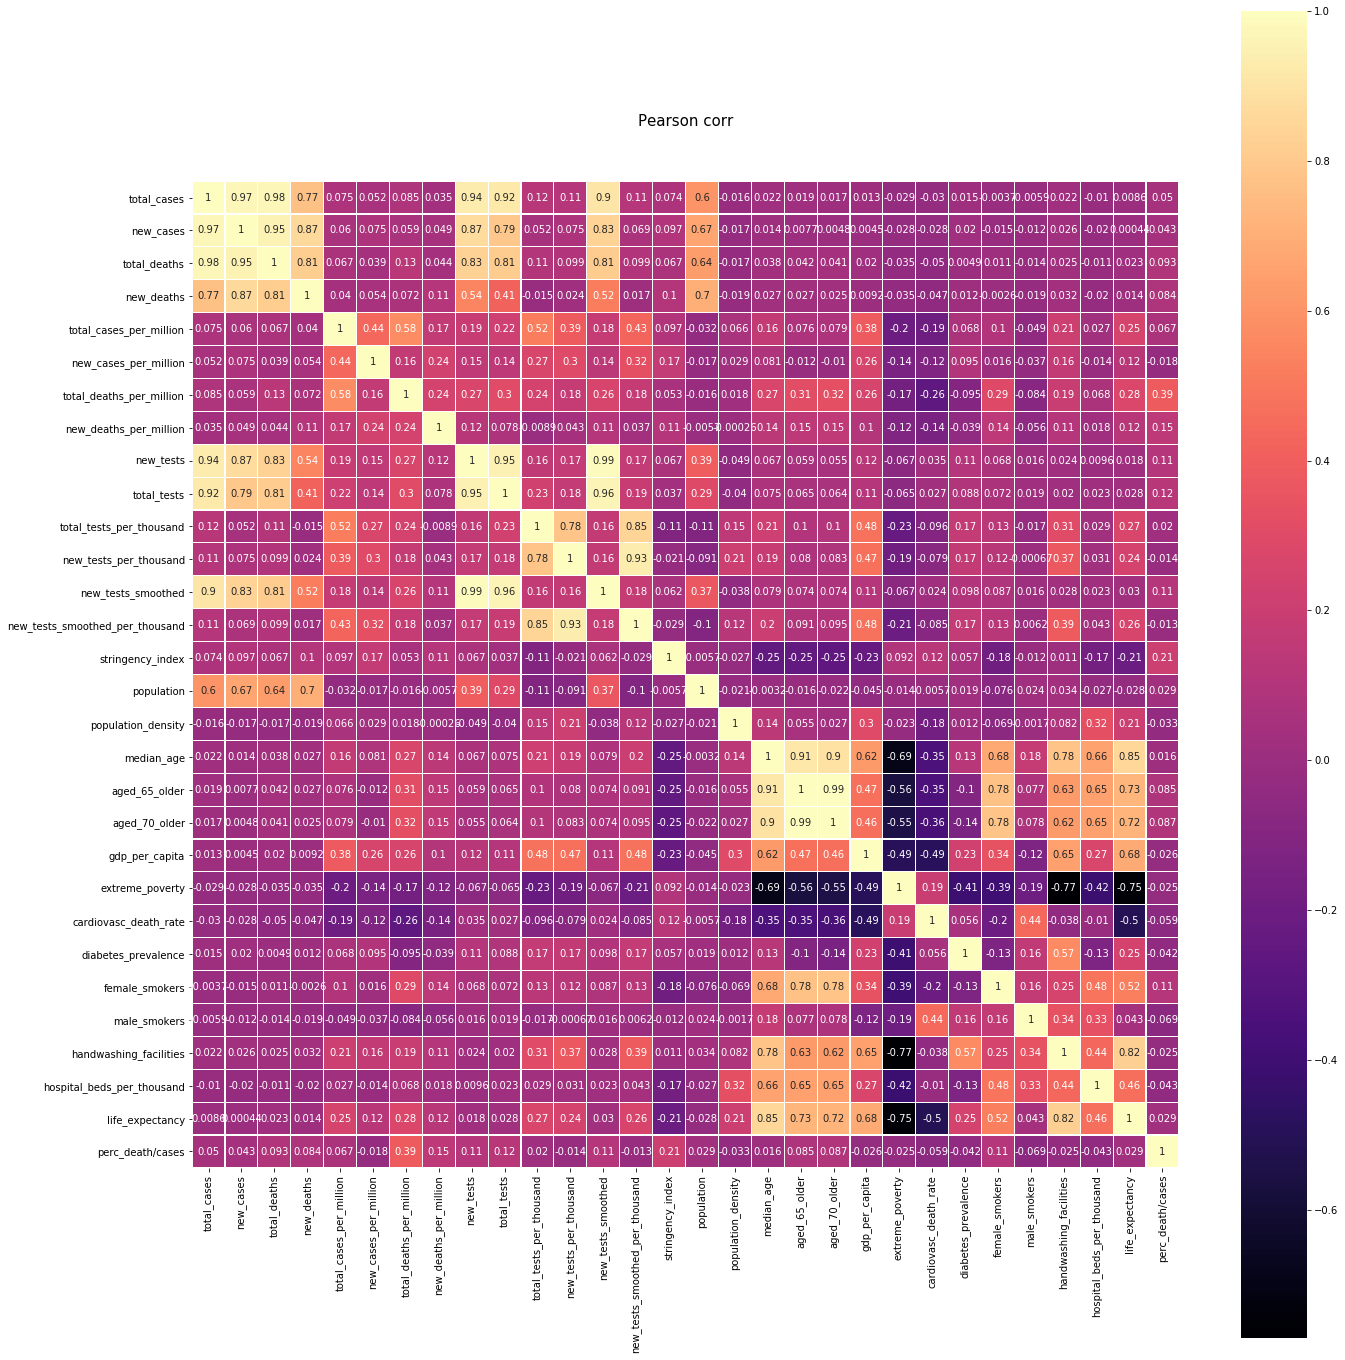

In [13]:
colormap=plt.cm.magma
f, ax = plt.subplots(figsize=(20,20))
plt.title("Pearson corr", y=1.05, size=15)
ax = sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white", annot=True)
plt.tight_layout()
# plt.savefig("corr_all.png")
plt.show()

As expected, population correlates with both the total amount of cases (0.6) and deaths (0.63), but interestingly, neither correlate with population density(-0.016 and -0.017 respectively).

Furthermore, richer countries seem to be testing more since as we can see, the gdp correlates (0.47) with the total amount of tests per 1000. This, together with the fact that ritcher countries have older population (0.62 corr between gdp and median_age) may explain why there is a slight correlation with the total deaths per million with the gpd per capita (0.26).

We can also observe that interestingly, handwashing facilities highly correlates with the life expectancy (0.82).


In [14]:
list_top_ten_cases = df.sort_values("total_cases", ascending=False)["location"].unique()[1:11]
list_top_ten_deaths = df.sort_values("total_deaths", ascending=False)["location"].unique()[1:11]
list_continents = df["continent"].unique()[:-1]
list_top_five_cases = df.sort_values("total_cases", ascending=False)["location"].unique()[1:6]
list_top_five_deaths = df.sort_values("total_deaths", ascending=False)["location"].unique()[1:6]
list_top_ten_testing_most = df.sort_values("total_tests_per_thousand", ascending=False)["location"].unique()[1:11]
list_top_five_currently_worst = df.loc[df["date"]==df["date"].max()].sort_values("new_cases", ascending=False)["location"].unique()[1:6]

In [15]:
filt1=df["location"].isin(list_top_ten_cases)
filt2=df["location"].isin(list_top_ten_deaths)

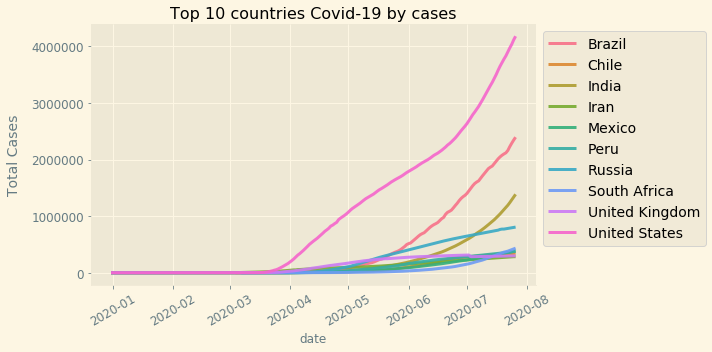

In [16]:
plt.rcParams["figure.figsize"] = (8,5)
plt.style.use("Solarize_Light2")
g=sns.FacetGrid(df.loc[filt1], hue="location", height=5, aspect=2)
g=g.map(plt.plot, "date", "total_cases", linewidth=3, linestyle="-", alpha=0.9)
plt.legend(scatterpoints=1, bbox_to_anchor=(1, 1), loc= "best", fontsize=14,  ncol=1)
plt.title("Top 10 countries Covid-19 by cases", fontsize=16)
plt.ylabel("Total Cases", labelpad=10, fontsize=14)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
plt.tight_layout()
# plt.savefig("lines_top10_cases.png")


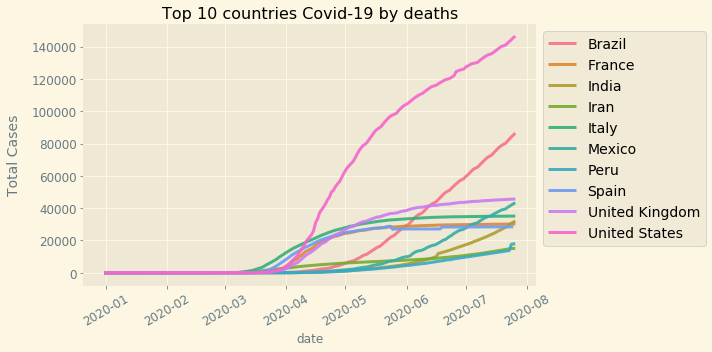

In [17]:
g=sns.FacetGrid(df.loc[filt2], hue="location", height=5, aspect=2)
g=g.map(plt.plot, "date", "total_deaths", linewidth=3, linestyle="-", alpha=0.9)
plt.legend(scatterpoints=1, bbox_to_anchor=(1, 1), loc= "best", fontsize=14,  ncol=1)
plt.title("Top 10 countries Covid-19 by deaths", fontsize=16)
plt.ylabel("Total Cases", labelpad=10, fontsize=14)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
plt.tight_layout()
# plt.savefig("lines_top10_deaths.png")

Lets take a global look at the pandemia by looking at the data for each continent. For this purpose I wull use a pivot table grouping the data from all countries from each continent

In [18]:
pivot_continent = pd.pivot_table(df, index=["date", "continent"], values=["total_cases","total_deaths","total_cases_per_million","new_cases", "new_deaths","new_cases_per_million", "total_deaths_per_million","new_tests", "new_tests_per_thousand"], aggfunc=["sum","mean"]).reset_index()

In [19]:
pivot_continent.columns

MultiIndex([(     'date',                         ''),
            ('continent',                         ''),
            (      'sum',                'new_cases'),
            (      'sum',    'new_cases_per_million'),
            (      'sum',               'new_deaths'),
            (      'sum',                'new_tests'),
            (      'sum',   'new_tests_per_thousand'),
            (      'sum',              'total_cases'),
            (      'sum',  'total_cases_per_million'),
            (      'sum',             'total_deaths'),
            (      'sum', 'total_deaths_per_million'),
            (     'mean',                'new_cases'),
            (     'mean',    'new_cases_per_million'),
            (     'mean',               'new_deaths'),
            (     'mean',                'new_tests'),
            (     'mean',   'new_tests_per_thousand'),
            (     'mean',              'total_cases'),
            (     'mean',  'total_cases_per_million'),
          

In [20]:
pivot_country = pd.pivot_table(df, index=["date", "location"], values=["total_cases","total_deaths","total_cases_per_million","total_deaths_per_million", "total_tests","new_cases", "new_deaths", "new_cases_per_million", "total_deaths_per_million"]).reset_index()

In [21]:
pivot_continent.columns = ["date", "continent","new_cases_sum","new_cases_per_million_sum","new_deaths_sum",'new_tests_sum', 'new_tests_per_thousand_sum',"total_cases_sum", "total_cases_per_million_sum", "total_deaths_sum","total_deaths_per_million_sum","new_cases_mean","new_cases_per_million_mean","new_deaths_mean", 'new_tests_mean', 'new_tests_per_thousand_mean', "total_cases_mean", "total_cases_per_million_mean", "total_deaths_mean","total_deaths_per_million_mean"]

In [22]:
pivot_continent.tail()

date      continent  new_cases_sum  new_cases_per_million_sum  \
1249 2020-07-26           Asia        72600.0                   1963.354   
1250 2020-07-26         Europe        11674.0                   1053.736   
1251 2020-07-26  North America        79394.0                   1611.470   
1252 2020-07-26        Oceania          364.0                     49.452   
1253 2020-07-26  South America        73113.0                   1112.288   

      new_deaths_sum  new_tests_sum  new_tests_per_thousand_sum  \
1249          1074.0       479498.0                       0.571   
1250           291.0        67822.0                      10.631   
1251          1749.0        44444.0                       1.178   
1252             6.0            0.0                       0.000   
1253          2026.0            0.0                       0.000   

      total_cases_sum  total_cases_per_million_sum  total_deaths_sum  \
1249        3826941.0                   171520.416           88232.0   
1250        2452715.0                   195882.039          172645.0   
1251        4938648.0                    78299.130          204937.0   
1252          15683.0                     3821.017             174.0   
1253        3682127.0                    67265.726          132908.0   

      total_deaths_per_million_sum  new_cases_mean  \
1249                      1584.157     1578.260870   
1250                      9160.807      233.480000   
1251                      2790.975     2205.388889   
1252                        74.620       45.500000   
1253                      2264.932     5624.076923   

      new_cases_per_million_mean  new_deaths_mean  new_tests_mean  \
1249                   42.681609        23.347826    79916.333333   
1250                   21.074720         5.820000    11303.666667   
1251                   44.763056        48.583333    44444.000000   
1252                    6.181500         0.750000             NaN   
1253                   85.560615       155.846154             NaN   

      new_tests_per_thousand_mean  total_cases_mean  \
1249                     0.095167      83194.369565   
1250                     1.771833      49054.300000   
1251                     1.178000     137184.666667   
1252                          NaN       1960.375000   
1253                          NaN     283240.538462   

      total_cases_per_million_mean  total_deaths_mean  \
1249                   3728.704696        1918.086957   
1250                   3917.640780        3452.900000   
1251                   2174.975833        5692.694444   
1252                    477.627125          21.750000   
1253                   5174.286615       10223.692308   

      total_deaths_per_million_mean  
1249                      34.438196  
1250                     183.216140  
1251                      77.527083  
1252                       9.327500  
1253                     174.225538

How many cases there are in each continent?

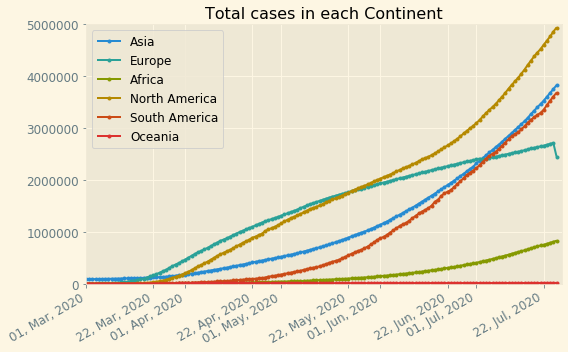

In [23]:
plt.rcParams["figure.figsize"] = (8,5)
plt.style.use("Solarize_Light2")
[(plt.plot_date(pivot_continent.loc[(pivot_continent["continent"] == i)]["date"], pivot_continent.loc[(pivot_continent["continent"] == i)]["total_cases_sum"], markersize=3, linewidth=2, linestyle='-')) for i in (list_continents)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_continents, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("Total cases in each Continent", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 5000000)
plt.tight_layout()
# plt.savefig("lines_total_cases_continents.png")

What are the average in the new cases being reported in each continent per million

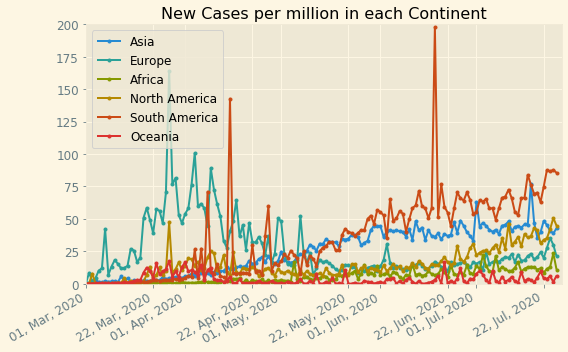

In [24]:
[(plt.plot_date(pivot_continent.loc[pivot_continent["continent"] == i]["date"], pivot_continent.loc[pivot_continent["continent"] == i]["new_cases_per_million_mean"], markersize=3, linewidth=2, linestyle='-')) for i in (list_continents)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_continents, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("New Cases per million in each Continent", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 200)
plt.tight_layout()
# plt.savefig("lines_cases_per_million_continents.png")

What is the amount of tests being performed in each continent

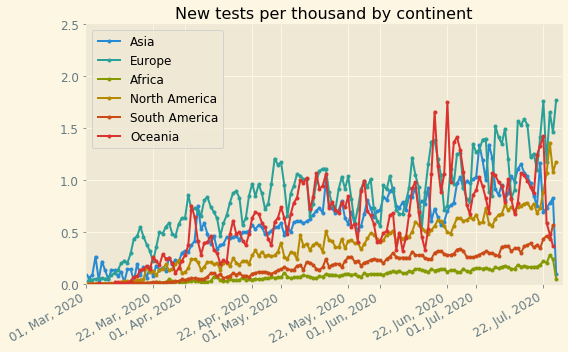

In [176]:
plt.rcParams["figure.figsize"] = (8,5)
[(plt.plot_date(pivot_continent.loc[pivot_continent["continent"] == i]["date"], pivot_continent.loc[pivot_continent["continent"] == i]["new_tests_per_thousand_mean"], markersize=3, linewidth=2, linestyle='-')) for i in (list_continents)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_continents, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("New tests per thousand by continent", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 2.5)
plt.tight_layout()
plt.savefig("new_tests_per_1000_continents.png")

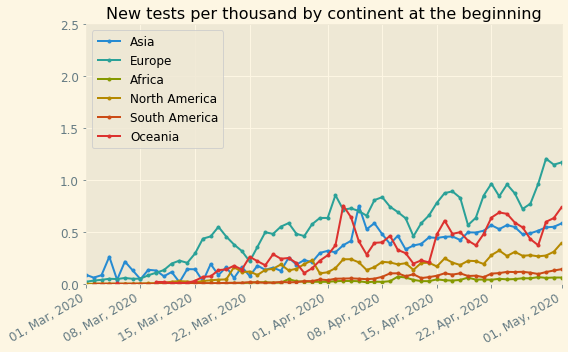

In [26]:
plt.rcParams["figure.figsize"] = (8,5)
[(plt.plot_date(pivot_continent.loc[pivot_continent["continent"] == i]["date"], pivot_continent.loc[pivot_continent["continent"] == i]["new_tests_per_thousand_mean"], markersize=3, linewidth=2, linestyle='-')) for i in (list_continents)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_continents, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("New tests per thousand by continent at the beginning", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime(2020,5,1)
plt.xlim([tstart, tend])
plt.ylim(0, 2.5)
plt.tight_layout()
# plt.savefig("New_tests_per_thousand_by_continent_beginning.png")

We can observe a low proportion of tests being done in Africa and South America. And Asia and Europe scaled-up the testing quickly, which may explain the lower impact of covid in these continents.

What about the number of deaths in each continent?

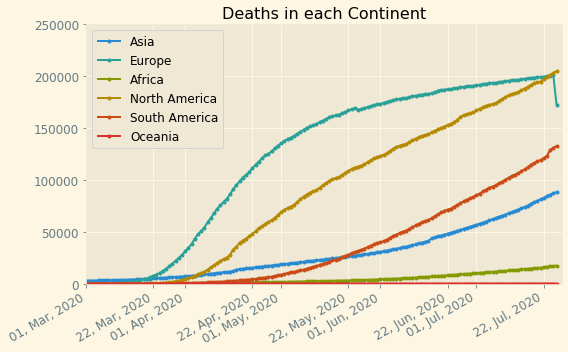

In [27]:
[(plt.plot_date(pivot_continent.loc[pivot_continent["continent"] == i]["date"], pivot_continent.loc[pivot_continent["continent"] == i]["total_deaths_sum"], markersize=3, linewidth=2, linestyle='-')) for i in (list_continents)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_continents, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("Deaths in each Continent", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 250000)
plt.tight_layout()
# plt.savefig("lines_total_deaths_continents.png")

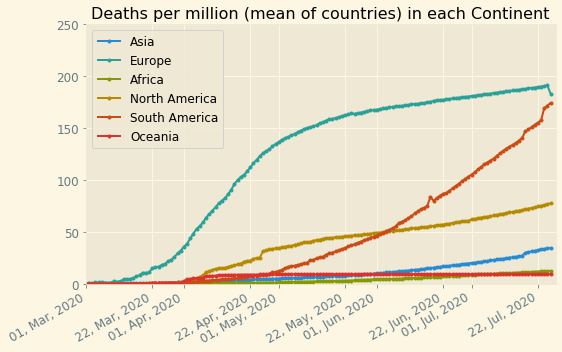

In [28]:
[(plt.plot_date(pivot_continent.loc[pivot_continent["continent"] == i]["date"], pivot_continent.loc[pivot_continent["continent"] == i]["total_deaths_per_million_mean"], markersize=3, linewidth=2, linestyle='-')) for i in (list_continents)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_continents, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("Deaths per million (mean of countries) in each Continent", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 250)
plt.tight_layout()
# plt.savefig("lines_total_deaths_continents_per_million.png")


Next, lets look at the daily recorded cases and deaths in the most affected countries to see how the spread of the virus has progressed so far

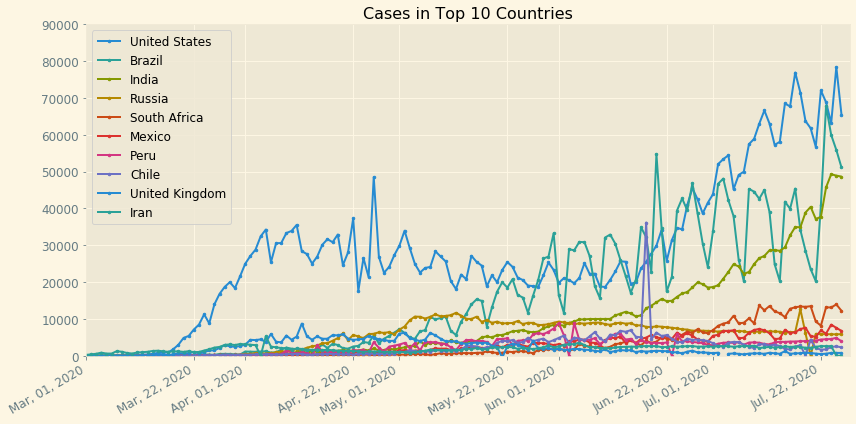

In [29]:
plt.rcParams["figure.figsize"] = (12,6)

[(plt.plot_date(df.loc[df["location"] == i]["date"], df.loc[df["location"] == i]["new_cases"], markersize=2.5, linewidth=2, linestyle='-')) for i in (list_top_ten_cases)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%b, %d, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_top_ten_cases, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("Cases in Top 10 Countries", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 90000)
plt.tight_layout()
# plt.savefig("daily_cases_top10_affected_countries.png")


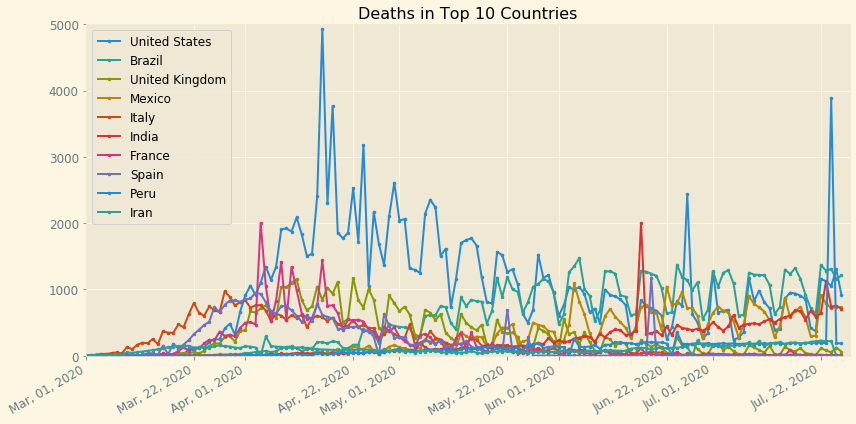

In [30]:
[(plt.plot_date(df.loc[df["location"] == i]["date"], df.loc[df["location"] == i]["new_deaths"], markersize=2.5, linewidth=2, linestyle='-')) for i in (list_top_ten_deaths)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%b, %d, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_top_ten_deaths, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("Deaths in Top 10 Countries", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 5000)
plt.tight_layout()

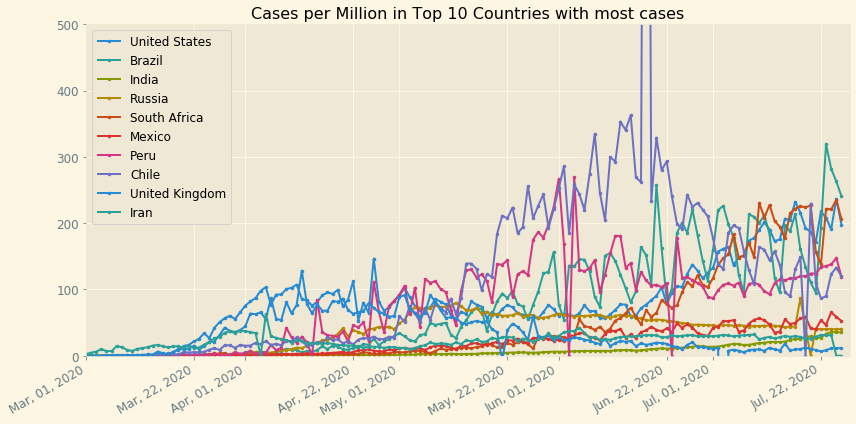

In [31]:
[(plt.plot_date(df.loc[df["location"] == i]["date"], df.loc[df["location"] == i]["new_cases_per_million"], markersize=2.5, linewidth=2, linestyle='-')) for i in (list_top_ten_cases)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%b, %d, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_top_ten_cases, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("Cases per Million in Top 10 Countries with most cases", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 500)
plt.tight_layout()

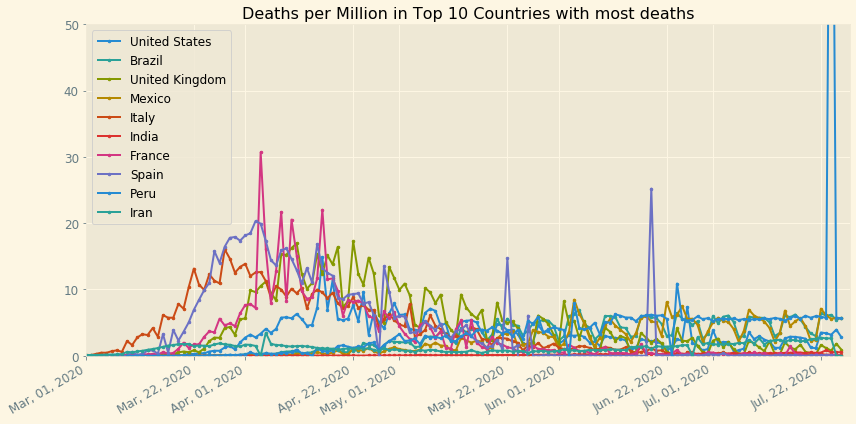

In [32]:
[(plt.plot_date(df.loc[df["location"] == i]["date"], df.loc[df["location"] == i]["new_deaths_per_million"], markersize=2.5, linewidth=2, linestyle='-')) for i in (list_top_ten_deaths)]
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%b, %d, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(list_top_ten_deaths, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.title("Deaths per Million in Top 10 Countries with most deaths", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 50)
plt.tight_layout()

In [33]:
df_resample = df[["date","location","new_cases"]].set_index("date")

In [34]:
df_spain = df_resample.loc[df_resample["location"] == "Spain"]

In [35]:
df_spain_2W = df_spain.resample("2W").sum()

In [36]:
df_spain_2W.reset_index(inplace=True)

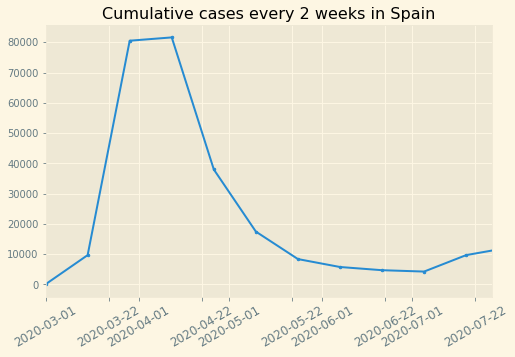

In [37]:
plt.rcParams["figure.figsize"] = (8,5)
plt.plot_date(df_spain_2W["date"], df_spain_2W["new_cases"], markersize=2.5, linewidth=2, linestyle='-')
plt.title("Cumulative cases every 2 weeks in Spain", fontsize=16)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.xticks(rotation="30", fontsize=12)
plt.show()

In [38]:
cases_weekly_korea = []
for i in range(len(df)):
    if df.loc[i,"location"]=="South Korea":
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]=="South Korea"))]["new_cases"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_korea.append((date, two_weeks_cases))

In [39]:
df_cases_weekly_korea = pd.DataFrame(cases_weekly_korea, columns=["date", "cases_weekly"])

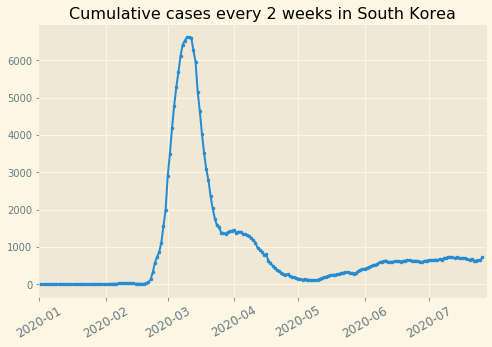

In [40]:
plt.plot_date(df_cases_weekly_korea["date"], df_cases_weekly_korea["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.title("Cumulative cases every 2 weeks in South Korea", fontsize=16)
tstart = datetime(2020,1,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.xticks(rotation="30", fontsize=12)
plt.show()

In [41]:
list_top_five_cases

array(['United States', 'Brazil', 'India', 'Russia', 'South Africa'],
      dtype=object)

In [42]:
list_top_five_deaths

array(['United States', 'Brazil', 'United Kingdom', 'Mexico', 'Italy'],
      dtype=object)

In [43]:
cases_weekly_top1 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_cases[0]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_cases[0]))]["new_cases"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top1.append((date, two_weeks_cases))

cases_weekly_top2 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_cases[1]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_cases[1]))]["new_cases"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top2.append((date, two_weeks_cases))
        
cases_weekly_top3 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_cases[2]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_cases[2]))]["new_cases"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top3.append((date, two_weeks_cases))

cases_weekly_top4 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_cases[3]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_cases[3]))]["new_cases"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top4.append((date, two_weeks_cases))

cases_weekly_top5 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_cases[4]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_cases[4]))]["new_cases"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top5.append((date, two_weeks_cases))

df_cases_weekly_top1 = pd.DataFrame(cases_weekly_top1, columns=["date", "cases_weekly"])
df_cases_weekly_top2 = pd.DataFrame(cases_weekly_top2, columns=["date", "cases_weekly"])
df_cases_weekly_top3 = pd.DataFrame(cases_weekly_top3, columns=["date", "cases_weekly"])
df_cases_weekly_top4 = pd.DataFrame(cases_weekly_top4, columns=["date", "cases_weekly"])
df_cases_weekly_top5 = pd.DataFrame(cases_weekly_top5, columns=["date", "cases_weekly"])

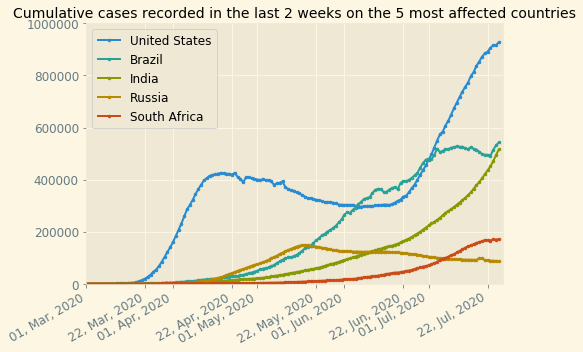

In [44]:
plt.rcParams["figure.figsize"] = (8,5)
plt.plot_date(df_cases_weekly_top1["date"], df_cases_weekly_top1["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top2["date"], df_cases_weekly_top2["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top3["date"], df_cases_weekly_top3["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top4["date"], df_cases_weekly_top4["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top5["date"], df_cases_weekly_top5["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.legend(list_top_five_cases, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Cumulative cases recorded in the last 2 weeks on the 5 most affected countries", fontsize=14)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 1000000)
plt.tight_layout()
# plt.savefig("cumulative_cases_2W_top5.png")
plt.show()

We can clearly see that in the United States the tendency in the reduction of cases has abrouptely been inverted, and its currently incresing quickly. It seems that this may be due to the spread of the virus accross states in America where mask policies and other restrictions have been more relaxed. Similar applies to Brazil, although the spread seems to be stabilizing. Finally, looking at the graph is appear like the spread is accelerating also in India, where due to its high population it may become the next epicenter of this pandemia.

Lets make some feature engineering to estimate an estimated amount of cases in the most affected countries based on the amount of tests performed

In [45]:
deaths_weekly_top1 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_deaths[0]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_deaths[0]))]["new_deaths"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top1.append((date, two_weeks_deaths))

deaths_weekly_top2 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_deaths[1]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_deaths[1]))]["new_deaths"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top2.append((date, two_weeks_deaths))
        
deaths_weekly_top3 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_deaths[2]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_deaths[2]))]["new_deaths"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top3.append((date, two_weeks_deaths))

deaths_weekly_top4 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_deaths[3]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_deaths[3]))]["new_deaths"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top4.append((date, two_weeks_deaths))

deaths_weekly_top5 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_five_deaths[4]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_five_deaths[4]))]["new_deaths"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top5.append((date, two_weeks_deaths))

df_deaths_weekly_top1 = pd.DataFrame(deaths_weekly_top1, columns=["date", "cases_weekly"])
df_deaths_weekly_top2 = pd.DataFrame(deaths_weekly_top2, columns=["date", "cases_weekly"])
df_deaths_weekly_top3 = pd.DataFrame(deaths_weekly_top3, columns=["date", "cases_weekly"])
df_deaths_weekly_top4 = pd.DataFrame(deaths_weekly_top4, columns=["date", "cases_weekly"])
df_deaths_weekly_top5 = pd.DataFrame(deaths_weekly_top5, columns=["date", "cases_weekly"])

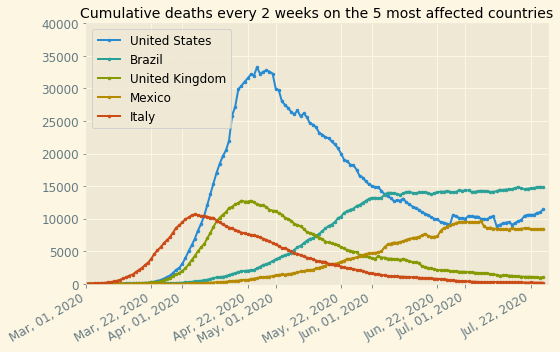

In [46]:
plt.plot_date(df_deaths_weekly_top1["date"], df_deaths_weekly_top1["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_deaths_weekly_top2["date"], df_deaths_weekly_top2["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_deaths_weekly_top3["date"], df_deaths_weekly_top3["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_deaths_weekly_top4["date"], df_deaths_weekly_top4["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_deaths_weekly_top5["date"], df_deaths_weekly_top5["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.legend(list_top_five_deaths, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%b, %d, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Cumulative deaths every 2 weeks on the 5 most affected countries", fontsize=14)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 40000)
plt.tight_layout()
# plt.savefig("cumulative_deaths_2W_top5.png")
plt.show()

Lets now take a look to the death rates among the countries. I will select a df containing  countries where the total amount of cases reported are above the mean (Most affected countries). I will also select those rows from the df that contain information about the test performed by 1000 since this is an important factor to consider.

In [47]:
df_droped_na = df.dropna(how="any", subset=["total_tests_per_thousand"])

In [48]:
df_droped_na = df_droped_na.loc[(df_droped_na["total_cases"]>df_droped_na["total_cases"].mean())].sort_values(by="perc_death/cases", ascending=False)

In [49]:
df_droped_na.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'perc_death/cases'],
      dtype='object')

In [50]:
list_countries = df_droped_na["location"].unique()

In [51]:
# lets create a df with the information most recent available for each country
df_recent= pd.DataFrame()
for i in list_countries:
    row = pd.DataFrame(df_droped_na.loc[(df_droped_na["location"]==i)].sort_values(by="date", ascending=False).iloc[0,:]).transpose()
    df_recent = df_recent.append(row,ignore_index=True) # apending each row (recent info for each country) to the new df

In [52]:
df_recent.sort_values(by="perc_death/cases", ascending=False, inplace=True)

In [53]:
df_recent.reset_index(inplace=True)

In [54]:
df_recent.columns

Index(['index', 'iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'perc_death/cases'],
      dtype='object')

In [55]:
for i in ['total_cases',
       'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'perc_death/cases']:
    df_recent[i] = df_recent[i].astype("float")

In [56]:
df_recent.dtypes

index                                       int64
iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object


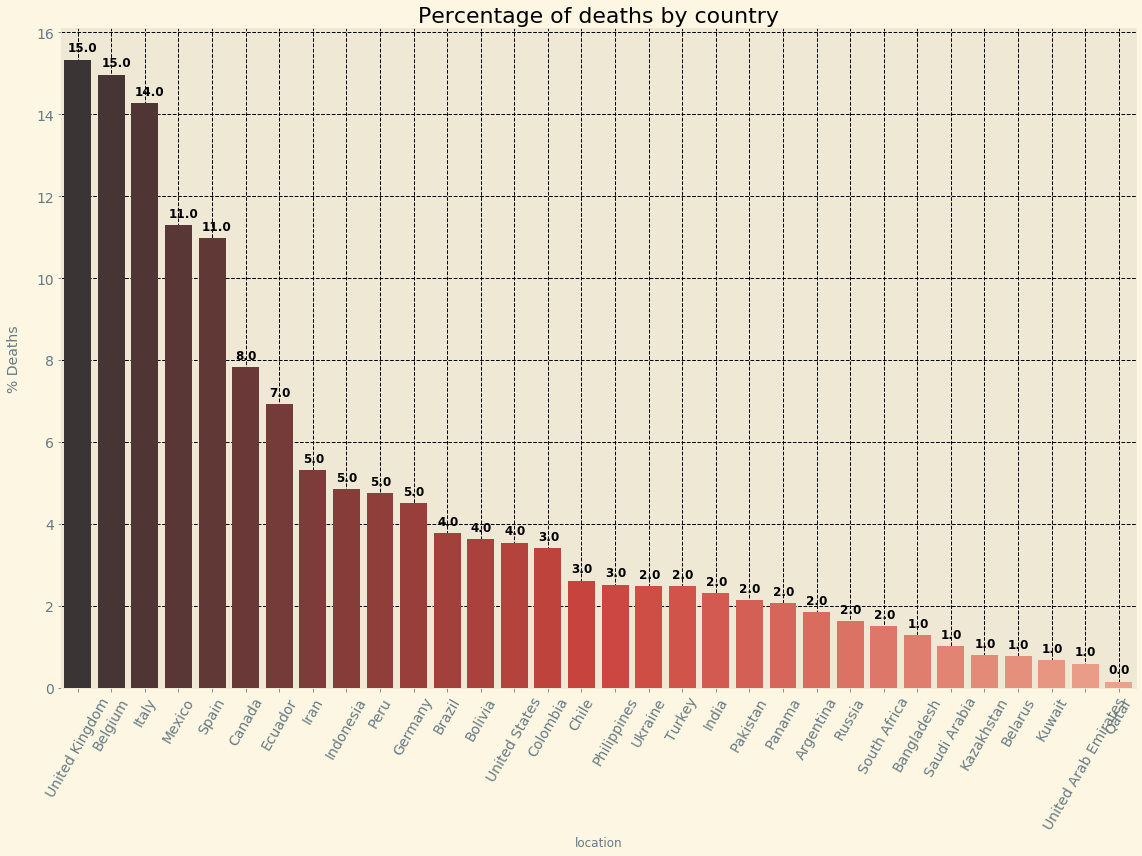

In [57]:
plt.rcParams["figure.figsize"] = (16,12)
x = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9,12.9, 13.9, 14.9, 15.9, 16.9, 17.9, 18.9, 19.9, 20.9, 21.9, 22.9, 23.9,24.9, 25.9, 26.9, 27.9, 28.9, 29.9, 30.9]
y = list(df_recent["perc_death/cases"])
countries = df_recent["location"]
sns.barplot(x=df_recent["location"],y=df_recent["perc_death/cases"], data=df_recent, palette="Reds_d")

plt.title("Percentage of deaths by country", fontsize=22)
plt.ylabel("% Deaths",  labelpad=15, fontsize=14)
plt.xticks(rotation="60", fontsize=14)
plt.yticks(rotation="horizontal", fontsize=14)
#plt.legend(df7["location"], loc="upper right")
plt.grid(color="k", linestyle="--")

for i, label in enumerate((df_recent["perc_death/cases"]).round()):
    plt.text(x[i]-0.2, y[i]+0.2, label, fontsize=12, fontweight='bold')
plt.tight_layout()
# plt.savefig("perc_deaths_country.png")

Looking at these data of deaths and testing we observe some important differences among countries regarding death rates. Lets take a look to the corr among variables to see what may be driving the differences in death rates

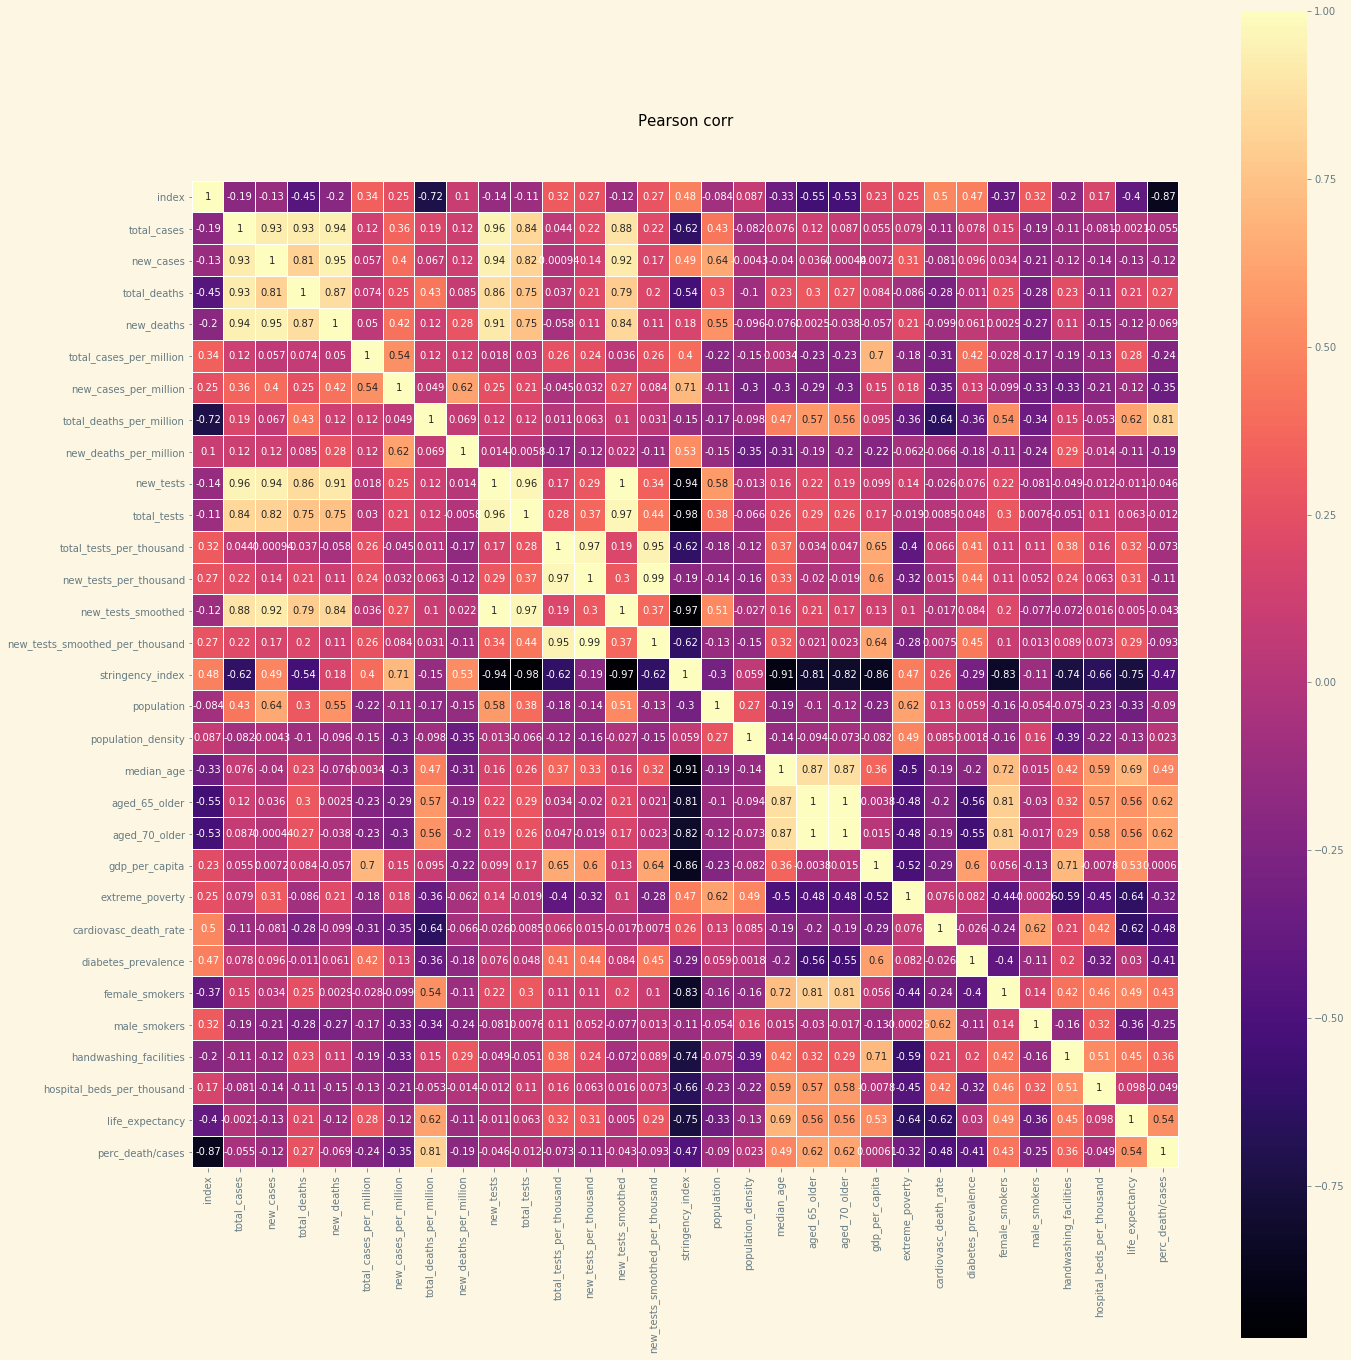

In [58]:
colormap=plt.cm.magma
f, ax = plt.subplots(figsize=(20,20))
plt.title("Pearson corr", y=1.05, size=15)
ax = sns.heatmap(df_recent.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white", annot=True)
plt.tight_layout()
plt.show()

A main factor that seems to be driving the higher death/cases ratio is the higher amount of older people (corr = 0.62) followed by life expectancy (0.53) and median age (0.49)

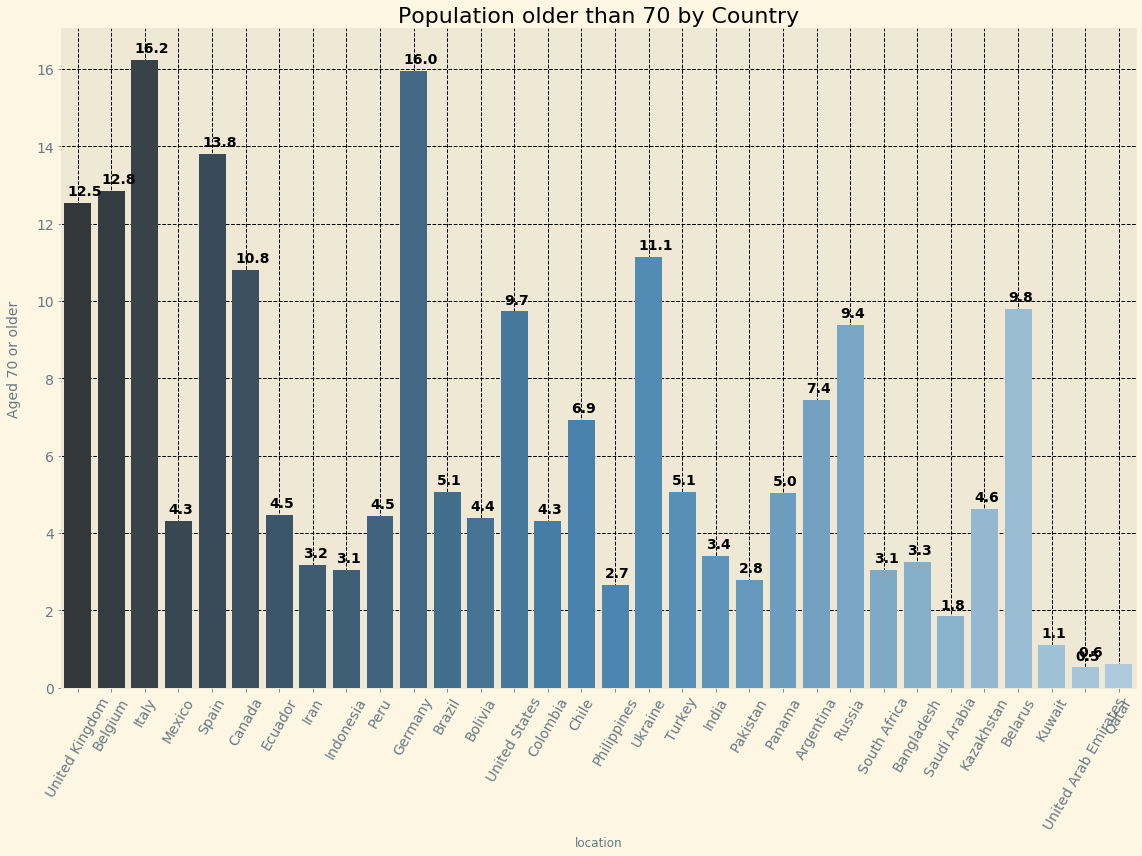

In [178]:
plt.rcParams["figure.figsize"] = (16,12)
x = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9,12.9, 13.9, 14.9, 15.9, 16.9, 17.9, 18.9, 19.9, 20.9, 21.9, 22.9, 23.9,24.9, 25.9, 26.9, 27.9, 28.9,29.9,30,9]
y = list(df_recent["aged_70_older"])
countries = df_recent["location"]
sns.barplot(x=df_recent["location"],y=df_recent["aged_70_older"], data=df_recent, palette="Blues_d")

plt.title("Population older than 70 by Country", fontsize=22)
plt.ylabel("Aged 70 or older",  labelpad=15, fontsize=14)
plt.xticks(rotation="60", fontsize=14)
plt.yticks(rotation="horizontal", fontsize=14)
#plt.legend(df7["location"], loc="upper right")
plt.grid(color="k", linestyle="--")

for i, label in enumerate(df_recent["aged_70_older"].round(1)):
    plt.text(x[i]-0.2, y[i]+0.2, label, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("population_aged70_country.png")

Germany stands out as a country with a high percentage of older populacion and yet a low death rate. Lets compare the data from Germany with the means of the data set to deduce posible factors driving this observation.

In [60]:
df_recent.describe()

index   total_cases     new_cases   total_deaths   new_deaths  \
count  32.000000  3.200000e+01     32.000000      32.000000    32.000000   
mean   15.500000  4.227918e+05   6737.562500   16942.593750   153.406250   
std     9.380832  7.938052e+05  15942.910881   29208.068114   271.010637   
min     0.000000  5.442600e+04      0.000000     164.000000     0.000000   
25%     7.750000  7.415950e+04    613.750000    2213.750000     4.750000   
50%    15.500000  2.192135e+05   1704.000000    6082.500000    39.500000   
75%    23.250000  3.087615e+05   4235.250000   15813.000000   192.750000   
max    31.000000  4.112529e+06  78427.000000  145546.000000  1304.000000   

       total_cases_per_million  new_cases_per_million  \
count                32.000000              32.000000   
mean               6598.327719              71.840375   
std                7111.374423              72.814510   
min                 355.677000               0.000000   
25%                2699.895250              15.324750   
50%                4535.117000              37.540000   
75%                7223.413250             129.232250   
max               37707.649000             236.938000   

       total_deaths_per_million  new_deaths_per_million      new_tests  \
count                 32.000000               32.000000      26.000000   
mean                 222.038969                2.067281   80998.000000   
std                  229.096700                2.618386  176529.471222   
min                   16.704000                0.000000    2070.000000   
25%                   50.282750                0.169250    9470.500000   
50%                  107.685500                0.996000   18246.000000   
75%                  326.675500                3.214750   45854.000000   
max                  846.879000               11.184000  797589.000000   

        total_tests  total_tests_per_thousand  new_tests_per_thousand  \
count  3.200000e+01                 32.000000               26.000000   
mean   5.014270e+06                 75.776875                0.974269   
std    9.912265e+06                 91.627601                1.108651   
min    1.294070e+05                  2.914000                0.028000   
25%    8.064082e+05                 11.546500                0.237500   
50%    1.664088e+06                 49.893500                0.725500   
75%    4.188416e+06                103.715500                1.174000   
max    5.063568e+07                482.984000                5.321000   

       new_tests_smoothed  new_tests_smoothed_per_thousand  stringency_index  \
count           32.000000                        32.000000          7.000000   
mean         68736.437500                         0.807688         69.310000   
std         153691.176592                         0.904975         16.771403   
min           2191.000000                         0.047000         39.350000   
25%           9801.500000                         0.225500         61.575000   
50%          22649.000000                         0.668500         74.070000   
75%          45343.750000                         0.889500         79.395000   
max         801014.000000                         4.560000         89.810000   

         population  population_density  median_age  aged_65_older  \
count  3.200000e+01           32.000000   32.000000      32.000000   
mean   1.190185e+08          154.835844   33.915625       9.774188   
std    2.445192e+08          236.161689    6.556706       6.164714   
min    2.881060e+06            4.037000   23.500000       1.144000   
25%    1.849330e+07           25.106750   29.250000       5.337750   
50%    4.881883e+07           66.691500   32.050000       7.398500   
75%    1.144190e+08          228.523500   39.775000      14.952500   
max    1.380004e+09         1265.036000   47.900000      23.021000   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count      32.000000       32.000000        25.000000  

In [61]:
df_germany = df_recent.loc[df_recent["location"]=="Germany"]

In [62]:
df_germany.describe()

index  total_cases  new_cases  total_deaths  new_deaths  \
count    1.0          1.0        1.0           1.0         1.0   
mean    12.0     201574.0      202.0        9084.0         1.0   
std      NaN          NaN        NaN           NaN         NaN   
min     12.0     201574.0      202.0        9084.0         1.0   
25%     12.0     201574.0      202.0        9084.0         1.0   
50%     12.0     201574.0      202.0        9084.0         1.0   
75%     12.0     201574.0      202.0        9084.0         1.0   
max     12.0     201574.0      202.0        9084.0         1.0   

       total_cases_per_million  new_cases_per_million  \
count                    1.000                  1.000   
mean                  2405.879                  2.411   
std                        NaN                    NaN   
min                   2405.879                  2.411   
25%                   2405.879                  2.411   
50%                   2405.879                  2.411   
75%                   2405.879                  2.411   
max                   2405.879                  2.411   

       total_deaths_per_million  new_deaths_per_million  new_tests  \
count                     1.000                   1.000        0.0   
mean                    108.422                   0.012        NaN   
std                         NaN                     NaN        NaN   
min                     108.422                   0.012        NaN   
25%                     108.422                   0.012        NaN   
50%                     108.422                   0.012        NaN   
75%                     108.422                   0.012        NaN   
max                     108.422                   0.012        NaN   

       total_tests  total_tests_per_thousand  new_tests_per_thousand  \
count          1.0                     1.000                     0.0   
mean     7418812.0                    88.547                     NaN   
std            NaN                       NaN                     NaN   
min      7418812.0                    88.547                     NaN   
25%      7418812.0                    88.547                     NaN   
50%      7418812.0                    88.547                     NaN   
75%      7418812.0                    88.547                     NaN   
max      7418812.0                    88.547                     NaN   

       new_tests_smoothed  new_tests_smoothed_per_thousand  stringency_index  \
count                 1.0                            1.000              1.00   
mean              75939.0                            0.906             39.35   
std                   NaN                              NaN               NaN   
min               75939.0                            0.906             39.35   
25%               75939.0                            0.906             39.35   
50%               75939.0                            0.906             39.35   
75%               75939.0                            0.906             39.35   
max               75939.0                            0.906             39.35   

       population  population_density  median_age  aged_65_older  \
count         1.0               1.000         1.0          1.000   
mean   83783945.0             237.016        46.6         21.453   
std           NaN                 NaN         NaN            NaN   
min    83783945.0             237.016        46.6         21.453   
25%    83783945.0             237.016        46.6         21.453   
50%    83783945.0             237.016        46.6         21.453   
75%    83783945.0             237.016        46.6         21.453   
max    83783945.0             237.016        46.6         21.453   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count          1.000           1.000              0.0                  1.000   
mean          15.957       45229.245              NaN                156.139   
std              NaN             NaN        

In [63]:
df_germany 

index iso_code continent location       date  total_cases  new_cases  \
10     12      DEU    Europe  Germany 2020-07-19     201574.0      202.0   

    total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
10        9084.0         1.0                 2405.879                  2.411   

    total_deaths_per_million  new_deaths_per_million  new_tests  total_tests  \
10                   108.422                   0.012        NaN    7418812.0   

    total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
10                    88.547                     NaN             75939.0   

    new_tests_smoothed_per_thousand      tests_units  stringency_index  \
10                            0.906  tests performed             39.35   

    population  population_density  median_age  aged_65_older  aged_70_older  \
10  83783945.0             237.016        46.6         21.453         15.957   

    gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
10       45229.245              NaN                156.139   

    diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
10                 8.31            28.2          33.1                     NaN   

    hospital_beds_per_thousand  life_expectancy  perc_death/cases  
10                         8.0            81.33          4.506534

The high life expectancy and high number of beds per 1000 in Germany points out to these factors as posible contributors to this observation. Otherwise this remains a mistery, since the cardiovascular death rate, diabetes incidence or males smokers are not particularly low in Germany compared to other countries.

On the other exteme is Mexico, which despite having a young population, it displayes one of the highest death/cases ratio. This could be due to the low testing rate in this country. Lets check this

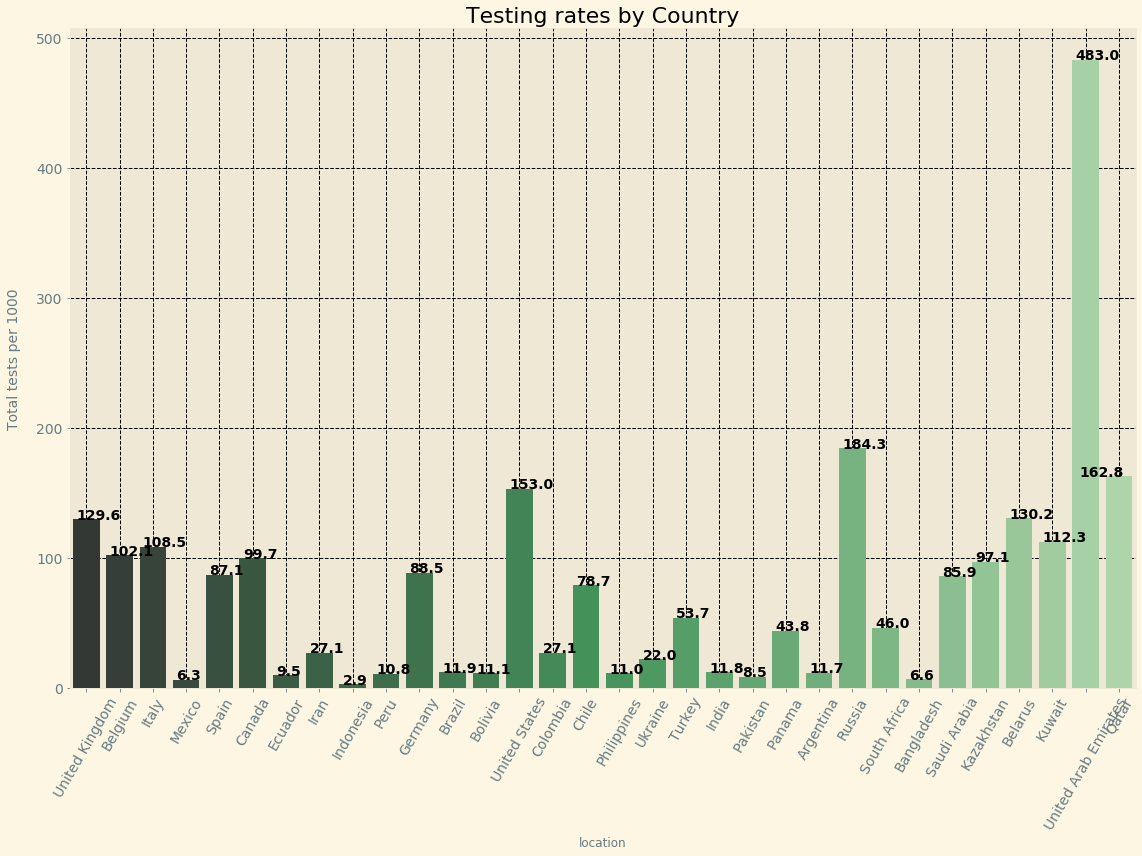

In [180]:
plt.rcParams["figure.figsize"] = (16,12)
x = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9,12.9, 13.9, 14.9, 15.9, 16.9, 17.9, 18.9, 19.9, 20.9, 21.9, 22.9, 23.9,24.9, 25.9, 26.9, 27.9, 28.9,29.9,30,9]
y = list(df_recent["total_tests_per_thousand"])
countries = df_recent["location"]
sns.barplot(x=df_recent["location"],y=df_recent["total_tests_per_thousand"], data=df_recent, palette="Greens_d")

plt.title("Testing rates by Country", fontsize=22)
plt.ylabel("Total tests per 1000",  labelpad=15, fontsize=14)
plt.xticks(rotation="60", fontsize=14)
plt.yticks(rotation="horizontal", fontsize=14)
#plt.legend(df7["location"], loc="upper right")
plt.grid(color="k", linestyle="--")

for i, label in enumerate(df_recent["total_tests_per_thousand"].round(1)):
    plt.text(x[i]-0.2, y[i]+0.2, label, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("test_rates_country.png")

Indeed, mexico appears to be one of the countries with the lowest testing rates

Another aspect that may be important in the control of the pandemia is the speed at which testing is done at the beginning, since a quick detection of the virus is critical for the control. Lets plot the cumulative number of tests weekly to compare the response of the different countries in different countries and to see whether if those with high testing rates at the beginning responded better by observing also at the cumulative cases.

In [65]:
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan 2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan 2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan 2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan 2020-01-04          0.0        0.0   
...        ...       ...            ...        ...          ...        ...   
32782      NaN       NaN  International 2020-02-28        705.0        0.0   
32783      NaN       NaN  International 2020-02-29        705.0        0.0   
32784      NaN       NaN  International 2020-03-01        705.0        0.0   
32785      NaN       NaN  International 2020-03-02        705.0        0.0   
32786      NaN       NaN  International 2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
0               0.0         0.0                      0.0   
1               0.0         0.0                      0.0   
2               0.0         0.0                      0.0   
3               0.0         0.0                      0.0   
4               0.0         0.0                      0.0   
...             ...         ...                      ...   
32782           4.0         0.0                      NaN   
32783           6.0         2.0                      NaN   
32784           6.0         0.0                      NaN   
32785           6.0         0.0                      NaN   
32786           7.0         1.0                      NaN   

       new_cases_per_million  total_deaths_per_million  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
...                      ...                       ...   
32782                    NaN                       NaN   
32783                    NaN                       NaN   
32784                    NaN                       NaN   
32785                    NaN                       NaN   
32786                    NaN                       NaN   

       new_deaths_per_million  new_tests  total_tests  \
0                         0.0        NaN          NaN   
1                         0.0        NaN          NaN   
2                         0.0        NaN          NaN   
3                         0.0        NaN          NaN   
4                         0.0        NaN          NaN   
...                       ...        ...          ...   
32782                     NaN        NaN          NaN   
32783                     NaN        NaN          NaN   
32784                     NaN        NaN          NaN   
32785                     NaN        NaN          NaN   
32786                     NaN        NaN          NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                           NaN                     NaN                 NaN   
1                           NaN                     NaN                 NaN   
2                           NaN                     NaN                 NaN   
3                           NaN                     NaN                 NaN   
4                           NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
32782                       NaN                     NaN                 NaN   
32783                       NaN                     NaN                 NaN   
32784                       NaN                     NaN                 NaN   
32785                       NaN                     NaN                 NaN   
32786                       NaN                     NaN                 NaN   

       new_tests_

In [66]:
df.loc[~(df["new_tests_per_thousand"].isnull())]["location"].unique()

array(['Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bolivia', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Ecuador', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Ghana', 'Greece', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mexico', 'Morocco',
       'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria',
       'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand

In [67]:
list_countries= ["Belgium", "Italy", "United States", "Denmark", "South Korea", "Switzerland","Austria"]

In [68]:
# First, lets look at the testing

cases_weekly_top1 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[0]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[0]))]["new_tests_per_thousand"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top1.append((date, two_weeks_cases))

cases_weekly_top2 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[1]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[1]))]["new_tests_per_thousand"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top2.append((date, two_weeks_cases))
        
cases_weekly_top3 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[2]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[2]))]["new_tests_per_thousand"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top3.append((date, two_weeks_cases))

cases_weekly_top4 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[3]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[3]))]["new_tests_per_thousand"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top4.append((date, two_weeks_cases))

cases_weekly_top5 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[4]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[4]))]["new_tests_per_thousand"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top5.append((date, two_weeks_cases))

        
cases_weekly_top6 = []   
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[5]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[5]))]["new_tests_per_thousand"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top6.append((date, two_weeks_cases))
        
cases_weekly_top7 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[4]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[6]))]["new_tests_per_thousand"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top7.append((date, two_weeks_cases))

        
        
df_cases_weekly_top1 = pd.DataFrame(cases_weekly_top1, columns=["date", "cases_weekly"])
df_cases_weekly_top2 = pd.DataFrame(cases_weekly_top2, columns=["date", "cases_weekly"])
df_cases_weekly_top3 = pd.DataFrame(cases_weekly_top3, columns=["date", "cases_weekly"])
df_cases_weekly_top4 = pd.DataFrame(cases_weekly_top4, columns=["date", "cases_weekly"])
df_cases_weekly_top5 = pd.DataFrame(cases_weekly_top5, columns=["date", "cases_weekly"])
df_cases_weekly_top6 = pd.DataFrame(cases_weekly_top6, columns=["date", "cases_weekly"])
df_cases_weekly_top7 = pd.DataFrame(cases_weekly_top7, columns=["date", "cases_weekly"])


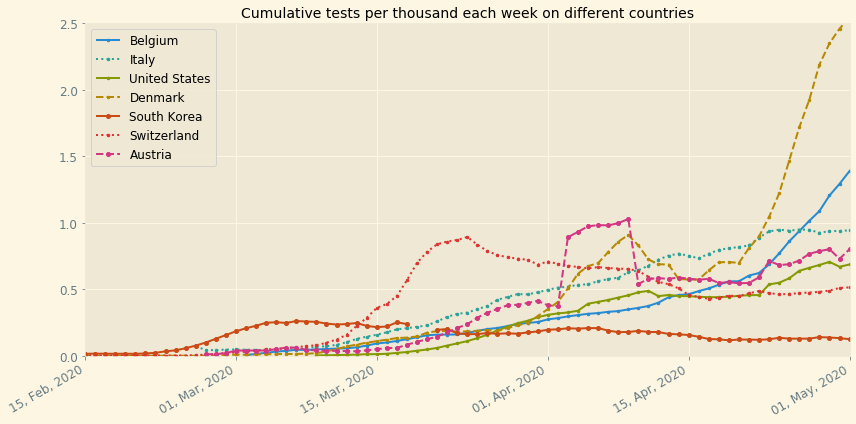

In [69]:
plt.rcParams["figure.figsize"] = (12,6)
plt.plot_date(df_cases_weekly_top1["date"], df_cases_weekly_top1["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top2["date"], df_cases_weekly_top2["cases_weekly"], markersize=2.5, linewidth=2, linestyle=':')
plt.plot_date(df_cases_weekly_top3["date"], df_cases_weekly_top3["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top4["date"], df_cases_weekly_top4["cases_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_cases_weekly_top5["date"], df_cases_weekly_top5["cases_weekly"], markersize=4, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top6["date"], df_cases_weekly_top6["cases_weekly"], markersize=2.5, linewidth=2, linestyle=':')
plt.plot_date(df_cases_weekly_top7["date"], df_cases_weekly_top7["cases_weekly"], markersize=4, linewidth=2, linestyle='--')

plt.legend(list_countries, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Cumulative tests per thousand each week on different countries", fontsize=14)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,2,15)
tend = datetime(2020,5,1)
plt.xlim([tstart, tend])
plt.ylim(0, 2.5)
plt.tight_layout()
# plt.savefig("cumulative_tests_W_per_1000.png")
plt.show()

In [70]:
# Second, lets look at the cases

cases_weekly_top1 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[0]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[0]))]["new_cases_per_million"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top1.append((date, two_weeks_cases))

cases_weekly_top2 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[1]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[1]))]["new_cases_per_million"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top2.append((date, two_weeks_cases))
        
cases_weekly_top3 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[2]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[2]))]["new_cases_per_million"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top3.append((date, two_weeks_cases))

cases_weekly_top4 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[3]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[3]))]["new_cases_per_million"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top4.append((date, two_weeks_cases))

cases_weekly_top5 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[4]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[4]))]["new_cases_per_million"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top5.append((date, two_weeks_cases))

        
cases_weekly_top6 = []   
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[5]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[5]))]["new_cases_per_million"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top6.append((date, two_weeks_cases))
        
cases_weekly_top7 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_countries[4]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=1)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_countries[6]))]["new_cases_per_million"].mean()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top7.append((date, two_weeks_cases))

   
        
df_cases_weekly_top1 = pd.DataFrame(cases_weekly_top1, columns=["date", "cases_weekly"])
df_cases_weekly_top2 = pd.DataFrame(cases_weekly_top2, columns=["date", "cases_weekly"])
df_cases_weekly_top3 = pd.DataFrame(cases_weekly_top3, columns=["date", "cases_weekly"])
df_cases_weekly_top4 = pd.DataFrame(cases_weekly_top4, columns=["date", "cases_weekly"])
df_cases_weekly_top5 = pd.DataFrame(cases_weekly_top5, columns=["date", "cases_weekly"])
df_cases_weekly_top6 = pd.DataFrame(cases_weekly_top6, columns=["date", "cases_weekly"])
df_cases_weekly_top7 = pd.DataFrame(cases_weekly_top7, columns=["date", "cases_weekly"])


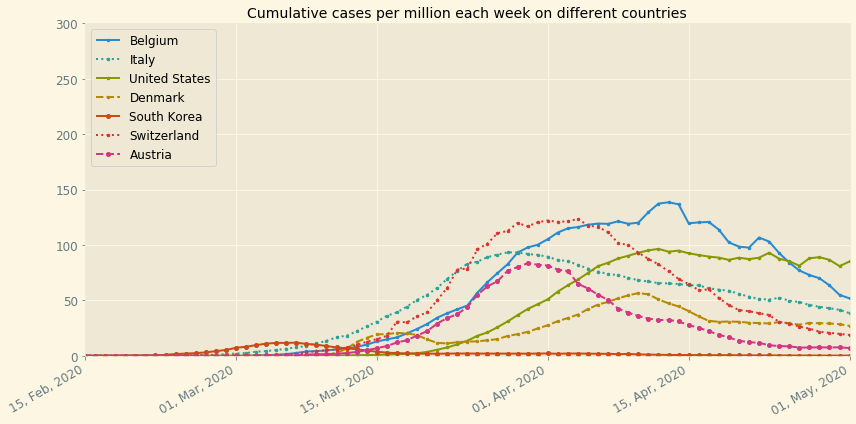

In [71]:
plt.plot_date(df_cases_weekly_top1["date"], df_cases_weekly_top1["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top2["date"], df_cases_weekly_top2["cases_weekly"], markersize=2.5, linewidth=2, linestyle=':')
plt.plot_date(df_cases_weekly_top3["date"], df_cases_weekly_top3["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top4["date"], df_cases_weekly_top4["cases_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_cases_weekly_top5["date"], df_cases_weekly_top5["cases_weekly"], markersize=4, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top6["date"], df_cases_weekly_top6["cases_weekly"], markersize=2.5, linewidth=2, linestyle=':')
plt.plot_date(df_cases_weekly_top7["date"], df_cases_weekly_top7["cases_weekly"], markersize=4, linewidth=2, linestyle='--')

plt.legend(list_countries, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%d, %b, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Cumulative cases per million each week on different countries", fontsize=14)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,2,15)
tend = datetime(2020,5,1)
plt.xlim([tstart, tend])
plt.ylim(0, 300)
plt.tight_layout()
# plt.savefig("cumulative_cases_W_per_million.png")
plt.show()

If we look at the beginning of the virus spread we observe that countries like south korea, switzerland or denmark, all scaled-up testing  quickly at the beginning, unlike in countries like Italy, Belgium and the United States where the testing was increased steadily but slowly.

Next, lets explore now the evolution of the cases in the currently most affected countries by the number of reported cases


In [72]:
df_top10 = df.loc[df["location"].isin(list_top_ten_cases)]

In [73]:
df_top10.isna().sum()

iso_code                              0
continent                             0
location                              0
date                                  0
total_cases                          42
new_cases                            42
total_deaths                         42
new_deaths                           42
total_cases_per_million              42
new_cases_per_million                42
total_deaths_per_million             42
new_deaths_per_million               42
new_tests                           777
total_tests                         711
total_tests_per_thousand            711
new_tests_per_thousand              777
new_tests_smoothed                  680
new_tests_smoothed_per_thousand     680
tests_units                         602
stringency_index                     59
population                            0
population_density                    0
median_age                            0
aged_65_older                         0
aged_70_older                         0


In [74]:
df_top10.dropna(how="any", subset=["total_tests"], inplace=True)

C:\Users\enriq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Due to the importance of high testing rates to further dig into the data, lets see whats happening with those countries that are testing the most

In [75]:
list_top_ten_testing_most = df.sort_values("total_tests_per_thousand", ascending=False)["location"].unique()[0:10]

In [76]:
list_top_ten_testing_most 

array(['Luxembourg', 'United Arab Emirates', 'Bahrain', 'Malta',
       'Denmark', 'Iceland', 'Russia', 'Lithuania', 'Israel', 'Qatar'],
      dtype=object)

In [77]:
filt_most_test = df["location"].isin(list_top_ten_testing_most )

In [78]:
df_most_test = df.loc[filt_most_test]

In [79]:
df_most_test

iso_code continent              location       date  total_cases  \
2300       BHR      Asia               Bahrain 2019-12-31          0.0   
2301       BHR      Asia               Bahrain 2020-01-01          0.0   
2302       BHR      Asia               Bahrain 2020-01-02          0.0   
2303       BHR      Asia               Bahrain 2020-01-03          0.0   
2304       BHR      Asia               Bahrain 2020-01-04          0.0   
...        ...       ...                   ...        ...          ...   
30766      ARE      Asia  United Arab Emirates 2020-07-22      57498.0   
30767      ARE      Asia  United Arab Emirates 2020-07-23      57734.0   
30768      ARE      Asia  United Arab Emirates 2020-07-24      57988.0   
30769      ARE      Asia  United Arab Emirates 2020-07-25      58249.0   
30770      ARE      Asia  United Arab Emirates 2020-07-26      58562.0   

       new_cases  total_deaths  new_deaths  total_cases_per_million  \
2300         0.0           0.0         0.0                    0.000   
2301         0.0           0.0         0.0                    0.000   
2302         0.0           0.0         0.0                    0.000   
2303         0.0           0.0         0.0                    0.000   
2304         0.0           0.0         0.0                    0.000   
...          ...           ...         ...                      ...   
30766      305.0         341.0         1.0                 5813.516   
30767      236.0         342.0         1.0                 5837.378   
30768      254.0         342.0         0.0                 5863.059   
30769      261.0         343.0         1.0                 5889.448   
30770      313.0         343.0         0.0                 5921.095   

       new_cases_per_million  total_deaths_per_million  \
2300                   0.000                     0.000   
2301                   0.000                     0.000   
2302                   0.000                     0.000   
2303                   0.000                     0.000   
2304                   0.000                     0.000   
...                      ...                       ...   
30766                 30.838                    34.478   
30767                 23.862                    34.579   
30768                 25.681                    34.579   
30769                 26.389                    34.680   
30770                 31.647                    34.680   

       new_deaths_per_million  new_tests  total_tests  \
2300                    0.000        NaN          NaN   
2301                    0.000        NaN          NaN   
2302                    0.000        NaN          NaN   
2303                    0.000        NaN          NaN   
2304                    0.000        NaN          NaN   
...                       ...        ...          ...   
30766                   0.101    47014.0    4623216.0   
30767                   0.101    54096.0    4677312.0   
30768                   0.000    46965.0    4724277.0   
30769                   0.101    52627.0    4776904.0   
30770                   0.000        NaN          NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
2300                        NaN                     NaN                 NaN   
2301                        NaN                     NaN                 NaN   
2302                        NaN                     NaN                 NaN   
2303                        NaN                     NaN                 NaN   
2304                        NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
30766                   467.445                   4.753             43779.0   
30767                   472.914                   5.470             44517.0   
30768                   477.663                   4.749             44289.0   
30769                   482.984                   5.321             45100.0   
30770        

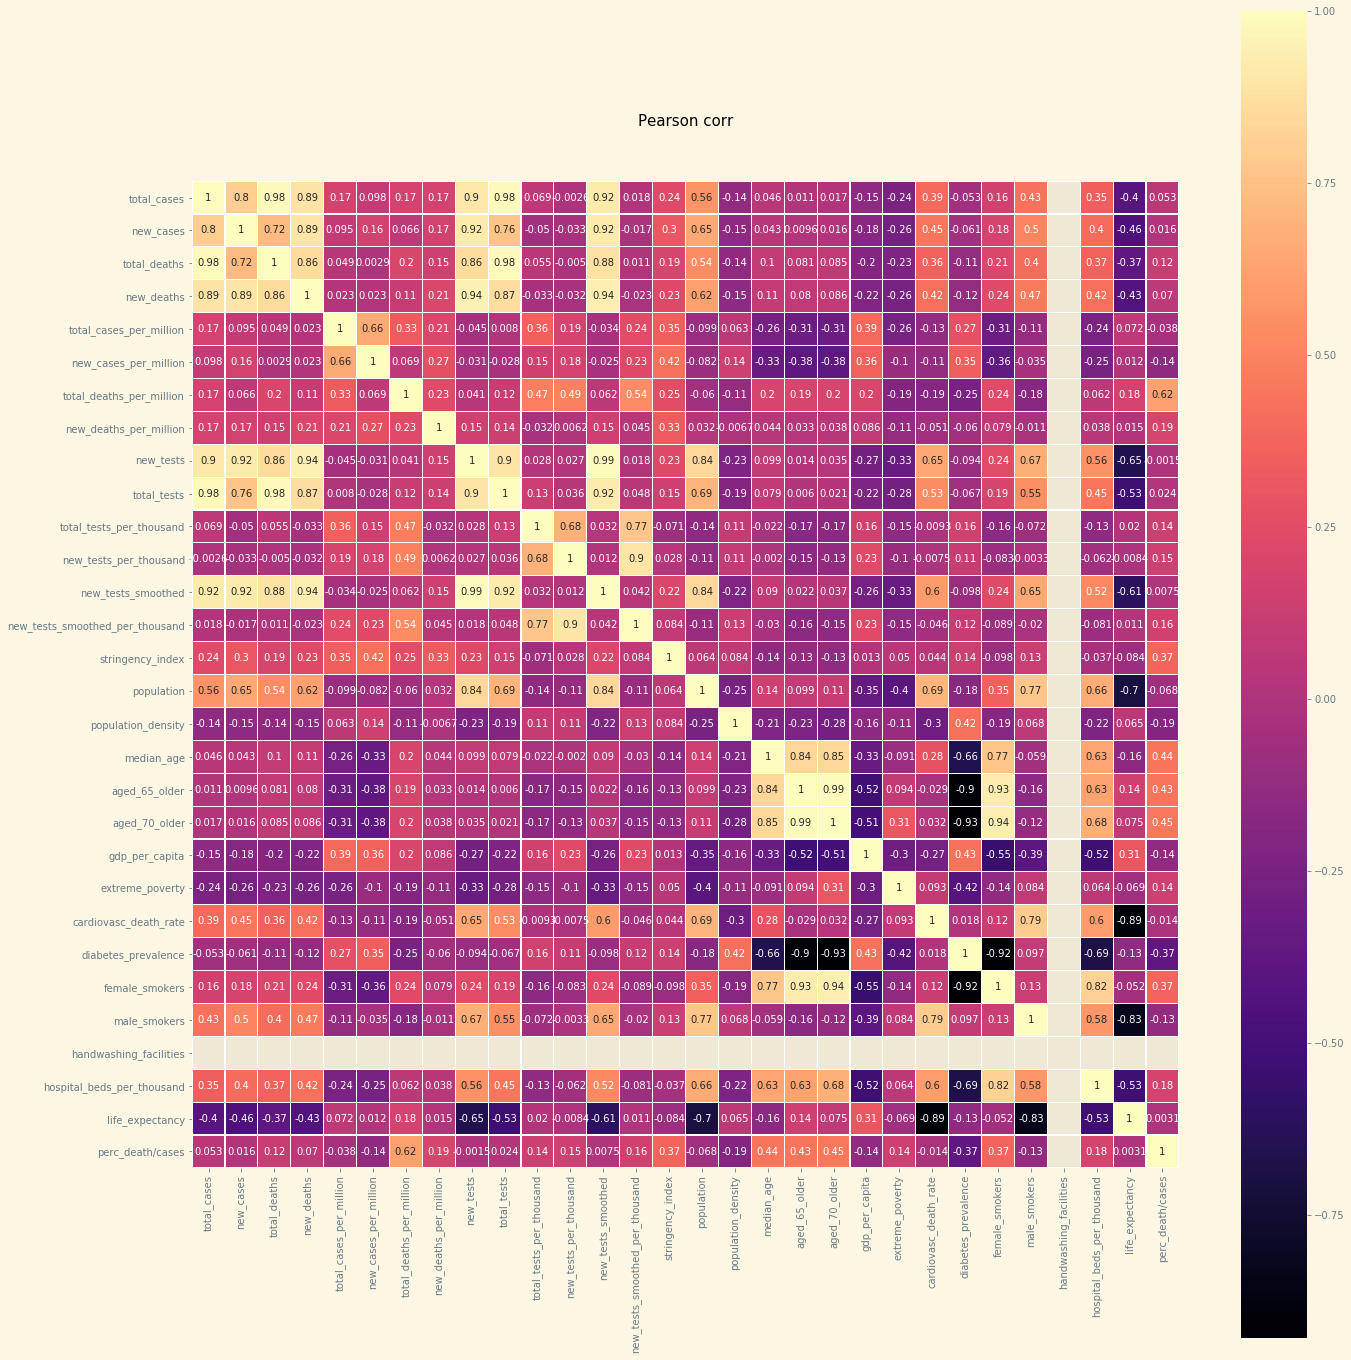

In [80]:
colormap=plt.cm.magma
f, ax = plt.subplots(figsize=(20,20))
plt.title("Pearson corr", y=1.05, size=15)
ax = sns.heatmap(df_most_test.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white", annot=True)
plt.tight_layout()
plt.show()

In [81]:
# Lets graph the progress of the cases per million in the countries testing most

cases_weekly_top1 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[0]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[0]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top1.append((date, two_weeks_cases))

cases_weekly_top2 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[1]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[1]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top2.append((date, two_weeks_cases))
        
cases_weekly_top3 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[2]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[2]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top3.append((date, two_weeks_cases))

cases_weekly_top4 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[3]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[3]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top4.append((date, two_weeks_cases))

cases_weekly_top5 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[4]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[4]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top5.append((date, two_weeks_cases))
        
cases_weekly_top6 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[5]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[5]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top6.append((date, two_weeks_cases))

cases_weekly_top7 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[6]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[6]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top7.append((date, two_weeks_cases))
        
cases_weekly_top8 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[7]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[7]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top8.append((date, two_weeks_cases))

cases_weekly_top9 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[8]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[8]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top9.append((date, two_weeks_cases))

cases_weekly_top10 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[9]:
        two_weeks_cases = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[9]))]["new_cases_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        cases_weekly_top10.append((date, two_weeks_cases))
        
df_cases_weekly_top1 = pd.DataFrame(cases_weekly_top1, columns=["date", "cases_weekly"])
df_cases_weekly_top2 = pd.DataFrame(cases_weekly_top2, columns=["date", "cases_weekly"])
df_cases_weekly_top3 = pd.DataFrame(cases_weekly_top3, columns=["date", "cases_weekly"])
df_cases_weekly_top4 = pd.DataFrame(cases_weekly_top4, columns=["date", "cases_weekly"])
df_cases_weekly_top5 = pd.DataFrame(cases_weekly_top5, columns=["date", "cases_weekly"])
df_cases_weekly_top6 = pd.DataFrame(cases_weekly_top6, columns=["date", "cases_weekly"])
df_cases_weekly_top7 = pd.DataFrame(cases_weekly_top7, columns=["date", "cases_weekly"])
df_cases_weekly_top8 = pd.DataFrame(cases_weekly_top8, columns=["date", "cases_weekly"])
df_cases_weekly_top9 = pd.DataFrame(cases_weekly_top9, columns=["date", "cases_weekly"])
df_cases_weekly_top10 = pd.DataFrame(cases_weekly_top10, columns=["date", "cases_weekly"])

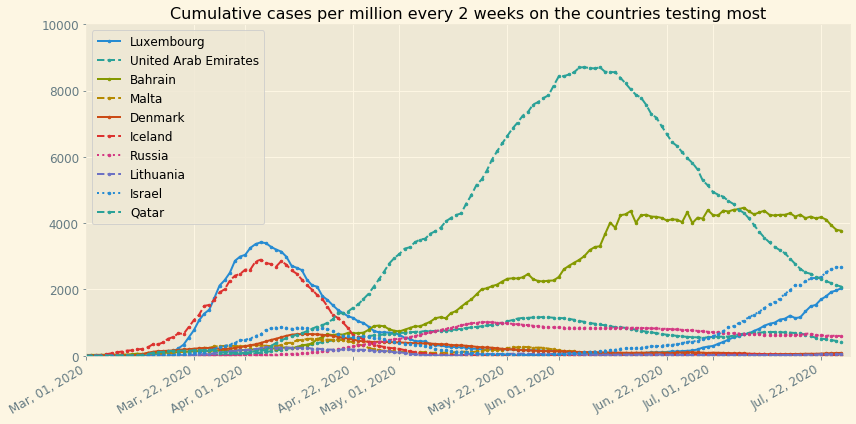

In [82]:
plt.rcParams["figure.figsize"] = (12,6)
plt.plot_date(df_cases_weekly_top1["date"], df_cases_weekly_top1["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top2["date"], df_cases_weekly_top2["cases_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_cases_weekly_top3["date"], df_cases_weekly_top3["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top4["date"], df_cases_weekly_top4["cases_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_cases_weekly_top5["date"], df_cases_weekly_top5["cases_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_cases_weekly_top6["date"], df_cases_weekly_top6["cases_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_cases_weekly_top7["date"], df_cases_weekly_top7["cases_weekly"], markersize=2.5, linewidth=2, linestyle=':')
plt.plot_date(df_cases_weekly_top8["date"], df_cases_weekly_top8["cases_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_cases_weekly_top9["date"], df_cases_weekly_top9["cases_weekly"], markersize=2.5, linewidth=2, linestyle=':')
plt.plot_date(df_cases_weekly_top10["date"], df_cases_weekly_top10["cases_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.legend(list_top_ten_testing_most, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%b, %d, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Cumulative cases per million every 2 weeks on the countries testing most", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 10000)
plt.tight_layout()
# plt.savefig("cumulative_cases_2W_per_million_hightesting.png")
plt.show()

In [83]:
# Lets graph the progress of the deaths per million in the countries testing most

deaths_weekly_top1 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[0]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[0]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top1.append((date, two_weeks_deaths))

deaths_weekly_top2 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[1]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[1]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top2.append((date, two_weeks_deaths))
        
deaths_weekly_top3 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[2]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[2]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top3.append((date, two_weeks_deaths))

deaths_weekly_top4 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[3]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[3]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top4.append((date, two_weeks_deaths))

deaths_weekly_top5 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[4]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[4]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top5.append((date, two_weeks_deaths))
        
deaths_weekly_top6 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[5]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[5]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top6.append((date, two_weeks_deaths))

deaths_weekly_top7 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[6]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[6]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top7.append((date, two_weeks_deaths))
        
deaths_weekly_top8 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[7]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[7]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top8.append((date, two_weeks_deaths))

deaths_weekly_top9 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[8]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[8]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top9.append((date, two_weeks_deaths))

deaths_weekly_top10 = []
for i in range(len(df)):
    if df.loc[i,"location"]==list_top_ten_testing_most[9]:
        two_weeks_deaths = df.loc[(((df["date"] >= (df.loc[i,"date"] - dateutil.relativedelta.relativedelta(weeks=2)))
            &(df["date"] < df.loc[i,"date"]))&(df["location"]==list_top_ten_testing_most[9]))]["new_deaths_per_million"].sum()
        
        date = df.loc[i,"date"]
    
        deaths_weekly_top10.append((date, two_weeks_deaths))
        
df_deaths_weekly_top1 = pd.DataFrame(deaths_weekly_top1, columns=["date", "deaths_weekly"])
df_deaths_weekly_top2 = pd.DataFrame(deaths_weekly_top2, columns=["date", "deaths_weekly"])
df_deaths_weekly_top3 = pd.DataFrame(deaths_weekly_top3, columns=["date", "deaths_weekly"])
df_deaths_weekly_top4 = pd.DataFrame(deaths_weekly_top4, columns=["date", "deaths_weekly"])
df_deaths_weekly_top5 = pd.DataFrame(deaths_weekly_top5, columns=["date", "deaths_weekly"])
df_deaths_weekly_top6 = pd.DataFrame(deaths_weekly_top6, columns=["date", "deaths_weekly"])
df_deaths_weekly_top7 = pd.DataFrame(deaths_weekly_top7, columns=["date", "deaths_weekly"])
df_deaths_weekly_top8 = pd.DataFrame(deaths_weekly_top8, columns=["date", "deaths_weekly"])
df_deaths_weekly_top9 = pd.DataFrame(deaths_weekly_top9, columns=["date", "deaths_weekly"])
df_deaths_weekly_top10 = pd.DataFrame(deaths_weekly_top10, columns=["date", "deaths_weekly"])

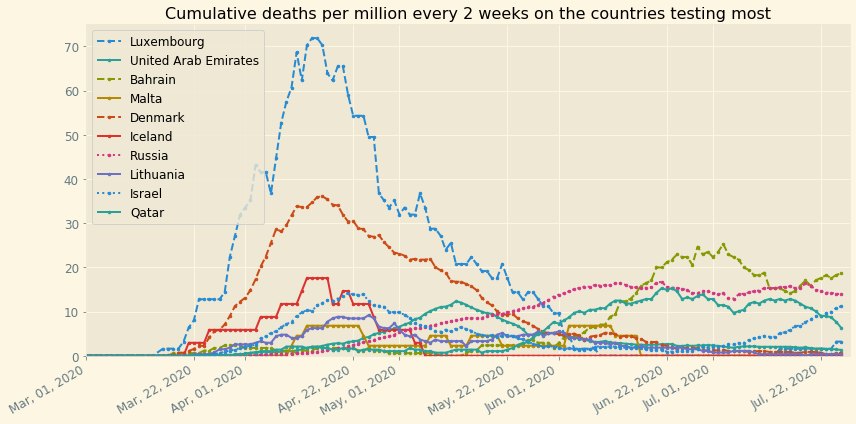

In [84]:
plt.rcParams["figure.figsize"] = (12,6)
plt.plot_date(df_deaths_weekly_top1["date"], df_deaths_weekly_top1["deaths_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_deaths_weekly_top2["date"], df_deaths_weekly_top2["deaths_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_deaths_weekly_top3["date"], df_deaths_weekly_top3["deaths_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_deaths_weekly_top4["date"], df_deaths_weekly_top4["deaths_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_deaths_weekly_top5["date"], df_deaths_weekly_top5["deaths_weekly"], markersize=2.5, linewidth=2, linestyle='--')
plt.plot_date(df_deaths_weekly_top6["date"], df_deaths_weekly_top6["deaths_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_deaths_weekly_top7["date"], df_deaths_weekly_top7["deaths_weekly"], markersize=2.5, linewidth=2, linestyle=':')
plt.plot_date(df_deaths_weekly_top8["date"], df_deaths_weekly_top8["deaths_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.plot_date(df_deaths_weekly_top9["date"], df_deaths_weekly_top9["deaths_weekly"], markersize=2.5, linewidth=2, linestyle=':')
plt.plot_date(df_deaths_weekly_top10["date"], df_deaths_weekly_top10["deaths_weekly"], markersize=2.5, linewidth=2, linestyle='-')
plt.legend(list_top_ten_testing_most, scatterpoints=1, loc= "upper left", fontsize=12,  ncol=1)
plt.gcf().autofmt_xdate() # gcf (get current figure)
date_format = mpl_dates.DateFormatter("%b, %d, %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Cumulative deaths per million every 2 weeks on the countries testing most", fontsize=16)
plt.xticks(rotation="30", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=12)
tstart = datetime(2020,3,1)
tend = datetime.now()
plt.xlim([tstart, tend])
plt.ylim(0, 75)
plt.tight_layout()
# plt.savefig("cumulative_deaths_2W_per_million_hightesting.png")
plt.show()

Overall, it seems that the countries where testing was greater, have managed to control so far the spread of the virus. This is a clear indication of the importance of performing tests to the population for the control of the virus.

Lets take a look to the death ratio (deaths/cases) in those countries

In [85]:
df_most_test["Percentage_death_cases"] = (df_most_test["total_deaths"]/df_most_test["total_cases"])*100

C:\Users\enriq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
df_most_test = df_most_test.loc[df_most_test["date"] == df_most_test["date"].max()].sort_values(by="Percentage_death_cases", ascending=False)

In [87]:
df_most_test

iso_code continent              location       date  total_cases  \
8304       DNK    Europe               Denmark 2020-07-26      13438.0   
17818      LTU    Europe             Lithuania 2020-07-26       2001.0   
18020      LUX    Europe            Luxembourg 2020-07-26       6189.0   
24739      RUS    Europe                Russia 2020-07-26     806720.0   
19106      MLT    Europe                 Malta 2020-07-26        686.0   
15095      ISR      Asia                Israel 2020-07-26      60678.0   
30770      ARE      Asia  United Arab Emirates 2020-07-26      58562.0   
13725      ISL    Europe               Iceland 2020-07-26       1843.0   
2507       BHR      Asia               Bahrain 2020-07-26      38747.0   
24323      QAT      Asia                 Qatar 2020-07-26     109036.0   

       new_cases  total_deaths  new_deaths  total_cases_per_million  \
8304         0.0         613.0         0.0                 2320.015   
17818       15.0          80.0         0.0                  735.043   
18020      133.0         112.0         0.0                 9886.961   
24739     5871.0       13192.0       146.0                 5527.961   
19106        0.0           9.0         0.0                 1553.657   
15095     1203.0         457.0         9.0                 7010.307   
30770      313.0         343.0         0.0                 5921.095   
13725        0.0          10.0         0.0                 5400.733   
2507       289.0         137.0         1.0                22771.149   
24323      398.0         164.0         0.0                37845.793   

       new_cases_per_million  total_deaths_per_million  \
8304                   0.000                   105.832   
17818                  5.510                    29.387   
18020                212.468                   178.921   
24739                 40.230                    90.397   
19106                  0.000                    20.383   
15095                138.986                    52.799   
30770                 31.647                    34.680   
13725                  0.000                    29.304   
2507                 169.842                    80.513   
24323                138.144                    56.923   

       new_deaths_per_million  new_tests  total_tests  \
8304                    0.000        NaN          NaN   
17818                   0.000        NaN          NaN   
18020                   0.000     4895.0     399477.0   
24739                   1.000        NaN          NaN   
19106                   0.000        NaN          NaN   
15095                   1.040        NaN          NaN   
30770                   0.000        NaN          NaN   
13725                   0.000        NaN          NaN   
2507                    0.588        NaN          NaN   
24323                   0.000        NaN          NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
8304                        NaN                     NaN                 NaN   
17818                       NaN                     NaN                 NaN   
18020                   638.167                    7.82              7819.0   
24739                       NaN                     NaN                 NaN   
19106                       NaN                     NaN                 NaN   
15095                       NaN                     NaN                 NaN   
30770                       NaN                     NaN                 NaN   
13725                       NaN                     NaN                 NaN   
2507                        NaN                     NaN                 NaN   
24323                       NaN                     NaN                 NaN   

       new_tests_smoothed_per_thousand    tests_units  stringency_index  \
8304                               NaN            NaN               NaN   
17818                              NaN            NaN               NaN   
18020                           12.491  people 

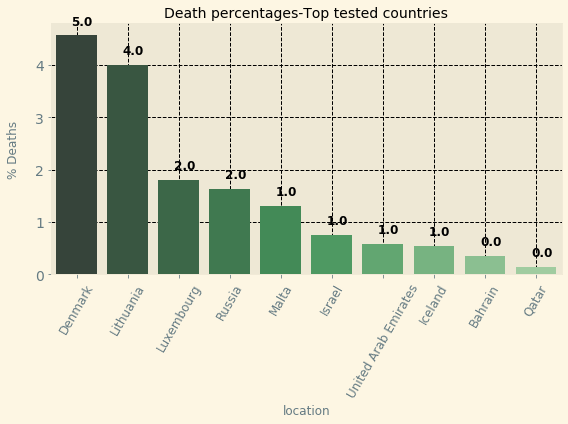

In [88]:
plt.rcParams["figure.figsize"] = (8,6)

x = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9]
y = list(df_most_test["Percentage_death_cases"])
countries = df_most_test["location"]
sns.barplot(x=df_most_test["location"],y=df_most_test["Percentage_death_cases"], data=df_most_test, palette="Greens_d")
plt.title("Death percentages-Top tested countries", fontsize=14)
plt.ylabel("% Deaths",  labelpad=15, fontsize=12)
plt.xticks(rotation="60", fontsize=12)
plt.yticks(rotation="horizontal", fontsize=14)
#plt.legend(df7["location"], loc="upper right")
plt.grid(color="k", linestyle="--")

for i, label in enumerate((df_most_test["Percentage_death_cases"].round())):
    plt.text(x[i]-0.0, y[i]+0.2, label, fontsize=12, fontweight='bold')
                          
plt.tight_layout()
# plt.savefig("death_perc_hightesting.png")
plt.show()

Indeed, low rates can be expected in those countries where testing is widely used

This dataset has provided us with some helpful insights into this pandemia. There is however an important piece of information missing, which is the recovery rates in each country. This is important because it gives us information about the stage of the pandemia in each country. For instance, countries with high recovery rates will likely experience a slow down in the number of infections, unlike in countries where most of cases are still active. To get this information I used the data available at https://www.worldometers.info/coronavirus/

In [89]:
df2 = pd.read_csv("worldometers.csv", parse_dates=True, encoding= 'unicode_escape')

In [90]:
df2.columns

Index(['#', 'Country, Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'Active Cases', 'Serious, Critical',
       'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ \n1M pop',
       'Population'],
      dtype='object')

In [91]:
df2.drop('#', inplace=True, axis=1)

In [92]:
df2["Total Recovered"] = df2["Total Recovered"].str.replace(",","")

In [93]:
df2["Total Recovered"] = df2["Total Recovered"].astype("float")

In [94]:
df2.dtypes

Country, Other        object
Total Cases            int64
New Cases            float64
Total Deaths         float64
New Deaths           float64
Total Recovered      float64
Active Cases          object
Serious, Critical    float64
Tot Cases/ 1M pop    float64
Deaths/ 1M pop       float64
Total Tests          float64
Tests/ \n1M pop      float64
Population           float64
dtype: object

In [95]:
df2["recovery_rate"] = (df2["Total Recovered"]/df2["Total Cases"])*100

In [96]:
df2

Country, Other  Total Cases  New Cases  Total Deaths  New Deaths  \
0            World     16424841    14362.0      652343.0       466.0   
1    North America      5129906     6341.0      208596.0       332.0   
2              USA      4371839        NaN      149849.0         NaN   
3             Asia      3905362     5222.0       90038.0        69.0   
4    South America      3742366     1148.0      134256.0        48.0   
..             ...          ...        ...           ...         ...   
226         Total:      2779194     1119.0      201447.0        11.0   
227         Total:       850628        NaN       17808.0         NaN   
228         Total:        16664      532.0         183.0         6.0   
229         Total:          721        NaN          15.0         NaN   
230         Total:     16424841    14362.0      652343.0       466.0   

     Total Recovered Active Cases  Serious, Critical  Tot Cases/ 1M pop  \
0         10052978.0    5,719,520            66229.0             2107.0   
1          2563023.0    2,358,287            26176.0                NaN   
2          2090129.0    2,131,861            18986.0            13202.0   
3          2821720.0      993,604            19426.0                NaN   
4          2492178.0    1,115,932            14283.0                NaN   
..               ...          ...                ...                ...   
226        1670387.0      907,360             5201.0                NaN   
227         494224.0      338,596             1091.0                NaN   
228          10795.0        5,686               48.0                NaN   
229            651.0           55                4.0                NaN   
230       10052978.0    5,719,520            66229.0             2107.0   

     Deaths/ 1M pop  Total Tests  Tests/ \n1M pop   Population  recovery_rate  
0              83.7          NaN              NaN          NaN      61.205938  
1               NaN          NaN              NaN          NaN      49.962377  
2             453.0   54219575.0         163736.0  331139904.0      47.808920  
3               NaN          NaN              NaN          NaN      72.252457  
4               NaN          NaN              NaN          NaN      66.593647  
..              ...          ...              ...          ...            ...  
226             NaN          NaN              NaN          NaN      60.103289  
227             NaN          NaN              NaN          NaN      58.101074  
228             NaN          NaN              NaN          NaN      64.780365  
229             NaN          NaN              NaN          NaN      90.291262  
230            83.7          NaN              NaN          NaN      61.205938  

[231 rows x 14 columns]

In [97]:
df2 = df2.loc[~(df2["Country, Other"] == "Total:")]

In [98]:
df_continents = df2.loc[(df2["Total Cases"]>df2["Total Cases"].mean())&(~(df2["Country, Other"].isin(["World", "North America","South America","Europe","Africa","Asia"])))]

In [99]:
df_countries = df2.loc[(df2["Total Cases"]>df2["Total Cases"].mean())&(~(df2["Country, Other"].isin(["World", "North America","South America","Europe","Africa","Asia"])))]

In [100]:
df_countries.reset_index(inplace=True)

In [101]:
df_countries.drop("index", axis=1, inplace=True)

C:\Users\enriq\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [102]:
df_countries = df_countries.sort_values(by="recovery_rate", ascending=False).dropna(how="any", subset=["recovery_rate"])

In [103]:
df_countries

Country, Other  Total Cases  New Cases  Total Deaths  New Deaths  \
15         Turkey       226100        NaN        5613.0         NaN   
7           Chile       345790        NaN        9112.0         NaN   
11       Pakistan       274289     1176.0        5842.0        20.0   
10           Iran       291172        NaN       15700.0         NaN   
12   Saudi Arabia       266941        NaN        2733.0         NaN   
14          Italy       246118        NaN       35107.0         NaN   
3          Russia       812485        NaN       13269.0         NaN   
6            Peru       384797        NaN       18229.0         NaN   
1          Brazil      2419901        NaN       87052.0         NaN   
5          Mexico       390516     5480.0       43680.0       306.0   
2           India      1437976     1957.0       32826.0        14.0   
4    South Africa       445433        NaN        6769.0         NaN   
16     Bangladesh       223453        NaN        2928.0         NaN   
13       Colombia       248976        NaN        8525.0         NaN   
0             USA      4371839        NaN      149849.0         NaN   

    Total Recovered Active Cases  Serious, Critical  Tot Cases/ 1M pop  \
15         209487.0       11,000             1249.0             2679.0   
7          318095.0       18,583             1592.0            18078.0   
11         241026.0       27,421             1229.0             1240.0   
10         253213.0       22,259             3695.0             3464.0   
12         220323.0       43,885             2120.0             7660.0   
14         198446.0       12,565               44.0             4071.0   
3          600250.0      198,966             2300.0             5567.0   
6          267850.0       98,718             1424.0            11660.0   
1         1634274.0      698,575             8318.0            11379.0   
5          251505.0       95,331             3922.0             3027.0   
2          918906.0      486,244             8944.0             1041.0   
4          265077.0      173,587              539.0             7504.0   
16         123882.0       96,643                1.0             1356.0   
13         125037.0      115,414             1493.0             4890.0   
0         2090129.0    2,131,861            18986.0            13202.0   

    Deaths/ 1M pop  Total Tests  Tests/ \n1M pop    Population  recovery_rate  
15            67.0    4572688.0          54178.0  8.440107e+07      92.652366  
7            476.0    1524533.0          79703.0  1.912759e+07      91.990804  
11            26.0    1890236.0           8547.0  2.211667e+08      87.873010  
10           187.0    2327850.0          27691.0  8.406531e+07      86.963376  
12            78.0    3056956.0          87719.0  3.484961e+07      82.536216  
14           581.0    6560572.0         108520.0  6.045523e+07      80.630429  
3             91.0   27141966.0         185982.0  1.459390e+08      73.878287  
6            552.0    2230247.0          67578.0  3.300251e+07      69.608131  
1            409.0   12601096.0          59253.0  2.126654e+08      67.534746  
5            339.0     918381.0           7118.0  1.290255e+08      64.403251  
2             24.0   16806803.0          12171.0  1.380938e+09      63.902736  
4            114.0    2773778.0          46729.0  5.935909e+07      59.509960  
16            18.0    1111558.0           6745.0  1.648021e+08      55.439846  
13           167.0    1409124.0          27673.0  5.091997e+07      50.220503  
0            453.0   54219575.0         163736.0  3.311399e+08      47.808920

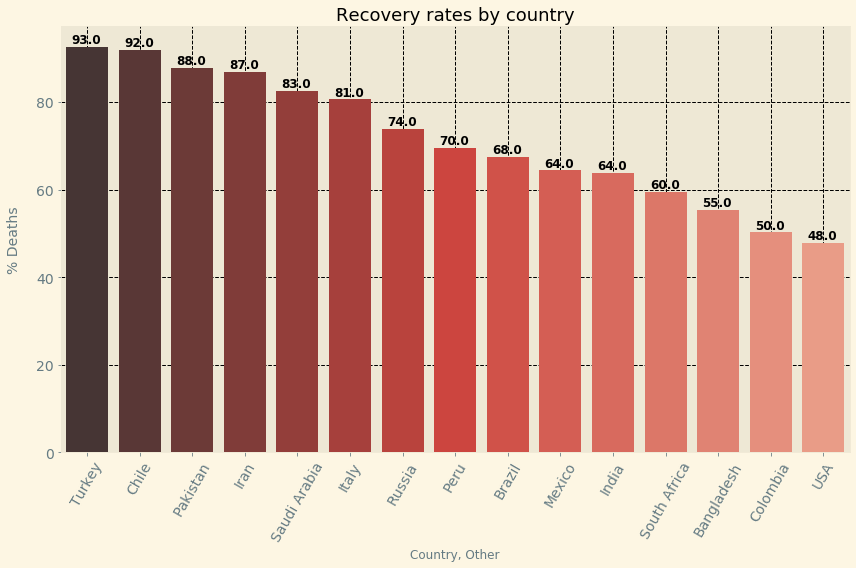

In [104]:
plt.rcParams["figure.figsize"] = (12,8)
x = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9,12.9, 13.9, 14.9, 15.9]
y = list(df_countries["recovery_rate"])
countries = df_countries["Country, Other"]
sns.barplot(x=df_countries["Country, Other"],y=df_countries["recovery_rate"], data=df_countries, palette="Reds_d")

plt.title("Recovery rates by country", fontsize=18)
plt.ylabel("% Deaths",  labelpad=15, fontsize=14)
plt.xticks(rotation="60", fontsize=14)
plt.yticks(rotation="horizontal", fontsize=14)
#plt.legend(df7["location"], loc="upper right")
plt.grid(color="k", linestyle="--")

for i, label in enumerate((df_countries["recovery_rate"]).round()):
    plt.text(x[i]-0.2, y[i]+0.8, label, fontsize=12, fontweight='bold')
plt.tight_layout()
# plt.savefig("recovery_rates.png")

These results indicate that number of deaths may increase in the coming weeks-days in Peru, Brazil, Mexico, India, South Africa, Colombia and USA since the recovery rates are still low in those countries. Next I will further investigate in what countries the increase in cases is currently more pronounce, and compare it to the recovery rates.

In [105]:
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan 2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan 2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan 2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan 2020-01-04          0.0        0.0   
...        ...       ...            ...        ...          ...        ...   
32782      NaN       NaN  International 2020-02-28        705.0        0.0   
32783      NaN       NaN  International 2020-02-29        705.0        0.0   
32784      NaN       NaN  International 2020-03-01        705.0        0.0   
32785      NaN       NaN  International 2020-03-02        705.0        0.0   
32786      NaN       NaN  International 2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
0               0.0         0.0                      0.0   
1               0.0         0.0                      0.0   
2               0.0         0.0                      0.0   
3               0.0         0.0                      0.0   
4               0.0         0.0                      0.0   
...             ...         ...                      ...   
32782           4.0         0.0                      NaN   
32783           6.0         2.0                      NaN   
32784           6.0         0.0                      NaN   
32785           6.0         0.0                      NaN   
32786           7.0         1.0                      NaN   

       new_cases_per_million  total_deaths_per_million  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
...                      ...                       ...   
32782                    NaN                       NaN   
32783                    NaN                       NaN   
32784                    NaN                       NaN   
32785                    NaN                       NaN   
32786                    NaN                       NaN   

       new_deaths_per_million  new_tests  total_tests  \
0                         0.0        NaN          NaN   
1                         0.0        NaN          NaN   
2                         0.0        NaN          NaN   
3                         0.0        NaN          NaN   
4                         0.0        NaN          NaN   
...                       ...        ...          ...   
32782                     NaN        NaN          NaN   
32783                     NaN        NaN          NaN   
32784                     NaN        NaN          NaN   
32785                     NaN        NaN          NaN   
32786                     NaN        NaN          NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                           NaN                     NaN                 NaN   
1                           NaN                     NaN                 NaN   
2                           NaN                     NaN                 NaN   
3                           NaN                     NaN                 NaN   
4                           NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
32782                       NaN                     NaN                 NaN   
32783                       NaN                     NaN                 NaN   
32784                       NaN                     NaN                 NaN   
32785                       NaN                     NaN                 NaN   
32786                       NaN                     NaN                 NaN   

       new_tests_

In [106]:
new_cases_last_2_weeks = []
for i in df["location"].unique():
    data_cases = df.loc[(df["date"] >= df["date"].max() - dateutil.relativedelta.relativedelta(weeks=2))&(df["date"] < df["date"].max())&(df["location"] == i)]["new_cases_per_million"].sum()
    data_total_cases = df.loc[(df["date"] >= df["date"].max() - dateutil.relativedelta.relativedelta(weeks=2))&(df["date"] < df["date"].max())&(df["location"] == i)]["total_cases"].max()
    new_cases_last_2_weeks.append((i, data_cases, data_total_cases))

In [107]:
new_cases_per_million_last_2_weeks = pd.DataFrame(new_cases_last_2_weeks, columns=["location","cases","total_cases"])

In [108]:
new_cases_per_million_last_2_weeks = new_cases_per_million_last_2_weeks.loc[new_cases_per_million_last_2_weeks["total_cases"]>new_cases_per_million_last_2_weeks["total_cases"].mean()]

In [109]:
new_cases_per_million_last_2_weeks.sort_values(by="cases", ascending=False, inplace=True)

In [110]:
new_cases_per_million_last_2_weeks.reset_index(inplace=True)

In [111]:
new_cases_per_million_last_2_weeks.drop("index", axis=1, inplace=True)

In [112]:
top15_most_affected_now = new_cases_per_million_last_2_weeks[:15]

In [113]:
top15_most_affected_now

location     cases  total_cases
0    South Africa  2888.430     421996.0
1   United States  2803.289    4112529.0
2          Brazil  2552.411    2343366.0
3        Colombia  1823.109     233541.0
4            Peru  1707.972     375961.0
5           Chile  1675.542     341304.0
6    Saudi Arabia  1042.286     262772.0
7          Mexico   691.143     378285.0
8          Russia   595.562     800849.0
9           World   421.947   15762581.0
10          Spain   395.959     272421.0
11          India   373.871    1336861.0
12           Iran   372.817     284034.0
13     Bangladesh   244.188     218658.0
14         Turkey   157.542     224252.0

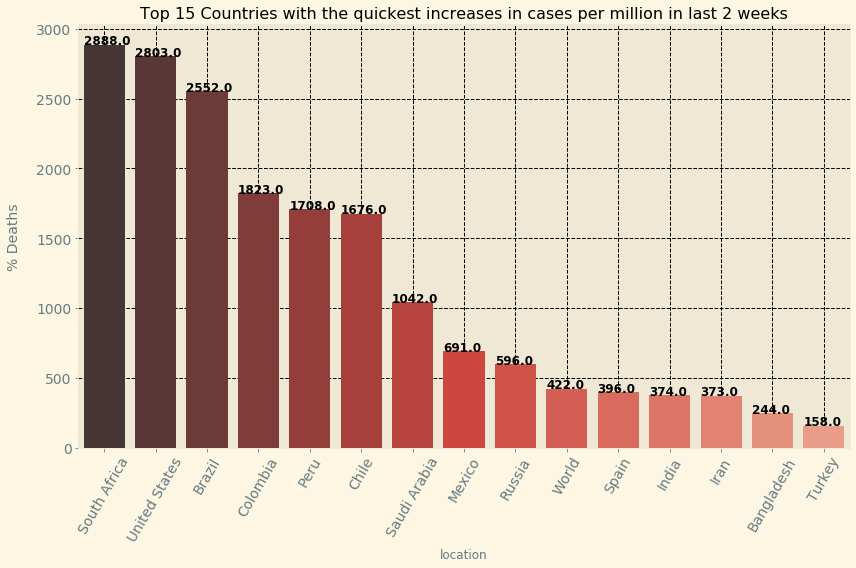

In [114]:
plt.rcParams["figure.figsize"] = (12,8)
x = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9,12.9, 13.9, 14.9, 15.9]
y = list(top15_most_affected_now["cases"])
countries = top15_most_affected_now["location"]
sns.barplot(x=top15_most_affected_now["location"],y=top15_most_affected_now["cases"], data=top15_most_affected_now, palette="Reds_d")

plt.title("Top 15 Countries with the quickest increases in cases per million in last 2 weeks", fontsize=16)
plt.ylabel("% Deaths",  labelpad=15, fontsize=14)
plt.xticks(rotation="60", fontsize=14)
plt.yticks(rotation="horizontal", fontsize=14)
#plt.legend(df7["location"], loc="upper right")
plt.grid(color="k", linestyle="--")

for i, label in enumerate((top15_most_affected_now["cases"]).round(0)):
    plt.text(x[i]-0.3, y[i]+2, label, fontsize=12, fontweight='bold')
plt.tight_layout()
# plt.savefig("countries_highest_increase_currently.png")

USA, Colombia, South Africa, India, Mexico, Brazil and Peru were the countries were the countries with the lowest recovery rates, and these are also the countries with highest cases recorded in the last two weeks, which confirms that the virus is spreading fastest in these countries

In [115]:
new_cases_per_million_last_2_weeks.loc[:20]

location     cases  total_cases
0     South Africa  2888.430     421996.0
1    United States  2803.289    4112529.0
2           Brazil  2552.411    2343366.0
3         Colombia  1823.109     233541.0
4             Peru  1707.972     375961.0
5            Chile  1675.542     341304.0
6     Saudi Arabia  1042.286     262772.0
7           Mexico   691.143     378285.0
8           Russia   595.562     800849.0
9            World   421.947   15762581.0
10           Spain   395.959     272421.0
11           India   373.871    1336861.0
12            Iran   372.817     284034.0
13      Bangladesh   244.188     218658.0
14          Turkey   157.542     224252.0
15          France   149.771     180528.0
16  United Kingdom   144.079     297914.0
17        Pakistan   115.603     271887.0
18         Germany    76.483     204964.0
19           Italy    48.806     245590.0

To conclude this EDA project I will be generate some interactive Data Visualizations with bokeh and plotly to get a feeling of how covid has spread around the world.
In particular I will plot:

* Total tests (per 1000 people) vs GDP per capita
* Total cases vs total deaths
* Total cases per million vs total deaths per million

per country

In [116]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'perc_death/cases'],
      dtype='object')

In [117]:
pivot_countries = pd.pivot_table(df, index=["location","continent"], values=['total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'perc_death/cases'], 
                          aggfunc=["max"]).reset_index()

In [118]:
pivot_countries

location continent           max                \
                              aged_65_older aged_70_older   
0       Afghanistan      Asia         2.581         1.337   
1           Albania    Europe        13.188         8.643   
2           Algeria    Africa         6.211         3.857   
3           Andorra    Europe           NaN           NaN   
4            Angola    Africa         2.405         1.362   
..              ...       ...           ...           ...   
205         Vietnam      Asia         7.150         4.718   
206  Western Sahara    Africa           NaN         1.380   
207           Yemen      Asia         2.922         1.583   
208          Zambia    Africa         2.480         1.542   
209        Zimbabwe    Africa         2.822         1.882   

                                                                              \
    cardiovasc_death_rate diabetes_prevalence extreme_poverty female_smokers   
0                 597.029                9.59             NaN            NaN   
1                 304.195               10.08             1.1            7.1   
2                 278.364                6.73             0.5            0.7   
3                 109.135                7.97             NaN           29.0   
4                 276.045                3.94             NaN            NaN   
..                    ...                 ...             ...            ...   
205               245.465                6.00             2.0            1.0   
206                   NaN                 NaN             NaN            NaN   
207               495.003                5.35            18.8            7.6   
208               234.499                3.94            57.5            3.1   
209               307.846                1.82            21.4            1.6   

                                                                      \
    gdp_per_capita handwashing_facilities hospital_beds_per_thousand   
0         1803.987                 37.746                       0.50   
1        11803.431                    NaN                       2.89   
2        13913.839                 83.741                       1.90   
3              NaN                    NaN                        NaN   
4         5819.495                 26.664                        NaN   
..             ...                    ...                        ...   
205       6171.884                 85.847                       2.60   
206            NaN                    NaN                        NaN   
207       1479.147                 49.542                       0.70   
208       3689.251                 13.938                       2.00   
209       1899.775                 36.791                       1.70   

                                                                             \
    life_expectancy male_smokers median_age new_cases new_cases_per_million   
0             64.83          NaN       18.6    1063.0                27.307   
1             78.57         51.2       38.0     119.0                41.351   
2             76.88         30.4       29.1     904.0                20.615   
3             83.73         37.8        NaN      79.0              1022.455   
4             61.15          NaN       16.8      62.0                 1.886   
..              ...          ...        ...       ...                   ...   
205           75.40         45.9       32.6      28.0                 0.288   
206           70.26          NaN       28.4     242.0               405.136   
207           66.12         29.2       20.3     116.0                 3.889   
208           63.89         24.7       17.7     527.0                28.666   
209           61.49         30.7       19.6     273.0                18.368   

                                                                        \
    new_deaths new_deaths_per_million new_tests new_tests_per_thousand   
0         56.0                  1.439       NaN                

In [119]:
pivot_countries.columns

MultiIndex([( 'location',                                ''),
            ('continent',                                ''),
            (      'max',                   'aged_65_older'),
            (      'max',                   'aged_70_older'),
            (      'max',           'cardiovasc_death_rate'),
            (      'max',             'diabetes_prevalence'),
            (      'max',                 'extreme_poverty'),
            (      'max',                  'female_smokers'),
            (      'max',                  'gdp_per_capita'),
            (      'max',          'handwashing_facilities'),
            (      'max',      'hospital_beds_per_thousand'),
            (      'max',                 'life_expectancy'),
            (      'max',                    'male_smokers'),
            (      'max',                      'median_age'),
            (      'max',                       'new_cases'),
            (      'max',           'new_cases_per_million'),
        

In [120]:
pivot_countries.isna().sum()

location                                        0
continent                                       0
max        aged_65_older                       27
           aged_70_older                       25
           cardiovasc_death_rate               25
           diabetes_prevalence                 17
           extreme_poverty                     89
           female_smokers                      70
           gdp_per_capita                      27
           handwashing_facilities             119
           hospital_beds_per_thousand          46
           life_expectancy                      3
           male_smokers                        72
           median_age                          24
           new_cases                            1
           new_cases_per_million                1
           new_deaths                           1
           new_deaths_per_million               1
           new_tests                          122
           new_tests_per_thousand             122


In [121]:
column_names = []
for i in range(len(pivot_countries.columns)):
    column_names.append(pivot_countries.columns[i][1])

In [122]:
column_names[0] = "location"
column_names[1] = "continent"

In [123]:
pivot_countries.columns = column_names

In [124]:
pivot_countries.isna().sum()

location                             0
continent                            0
aged_65_older                       27
aged_70_older                       25
cardiovasc_death_rate               25
diabetes_prevalence                 17
extreme_poverty                     89
female_smokers                      70
gdp_per_capita                      27
handwashing_facilities             119
hospital_beds_per_thousand          46
life_expectancy                      3
male_smokers                        72
median_age                          24
new_cases                            1
new_cases_per_million                1
new_deaths                           1
new_deaths_per_million               1
new_tests                          122
new_tests_per_thousand             122
new_tests_smoothed                 117
new_tests_smoothed_per_thousand    117
perc_death/cases                     0
population                           0
population_density                  11
stringency_index         

In [125]:
pivot_countries.dropna(how="any", subset = ["total_tests"], inplace=True)

In [126]:
pivot_countries.drop(["handwashing_facilities", "extreme_poverty", "new_tests", "new_tests_per_thousand"], axis=1, inplace=True)

In [127]:
pivot_countries.isna().sum()

location                           0
continent                          0
aged_65_older                      1
aged_70_older                      1
cardiovasc_death_rate              1
diabetes_prevalence                1
female_smokers                     4
gdp_per_capita                     2
hospital_beds_per_thousand         7
life_expectancy                    0
male_smokers                       5
median_age                         0
new_cases                          1
new_cases_per_million              1
new_deaths                         1
new_deaths_per_million             1
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
perc_death/cases                   0
population                         0
population_density                 1
stringency_index                   2
total_cases                        1
total_cases_per_million            1
total_deaths                       1
total_deaths_per_million           1
total_tests                        0
t

In [128]:
pivot_countries.dropna(how="any", inplace=True)

In [129]:
pivot_countries = pivot_countries.reset_index().drop("index", axis=1)

In [130]:
country_list = pivot_countries["location"].unique().tolist()
continent_list = pivot_countries["continent"].unique().tolist()

In [131]:
from bokeh.io import curdoc, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox, row
from bokeh.transform import factor_cmap

from bokeh.models.widgets import DateSlider
from bokeh.layouts import layout

In [132]:
# This is what enables the plot to be displayed within the notebook
output_notebook()

Loading BokehJS ...

In [133]:
pivot_countries

location      continent  aged_65_older  aged_70_older  \
0              Argentina  South America         11.198          7.441   
1              Australia        Oceania         15.504         10.129   
2                Austria         Europe         19.202         13.748   
3                Bahrain           Asia          2.372          1.387   
4             Bangladesh           Asia          5.098          3.262   
5                Belarus         Europe         14.799          9.788   
6                Belgium         Europe         18.571         12.849   
7                 Brazil  South America          8.552          5.060   
8               Bulgaria         Europe         20.801         13.272   
9                 Canada  North America         16.984         10.797   
10                 Chile  South America         11.087          6.938   
11              Colombia  South America          7.646          4.312   
12            Costa Rica  North America          9.468          5.694   
13               Croatia         Europe         19.724         13.053   
14        Czech Republic         Europe         19.027         11.580   
15               Denmark         Europe         19.677         12.325   
16               Ecuador  South America          7.104          4.458   
17           El Salvador  North America          8.273          5.417   
18               Estonia         Europe         19.452         13.491   
19              Ethiopia         Africa          3.526          2.063   
20                  Fiji        Oceania          6.224          3.284   
21               Finland         Europe         21.228         13.264   
22               Germany         Europe         21.453         15.957   
23                 Ghana         Africa          3.385          1.948   
24                Greece         Europe         20.396         14.524   
25               Hungary         Europe         18.577         11.976   
26               Iceland         Europe         14.431          9.207   
27                 India           Asia          5.989          3.414   
28             Indonesia           Asia          5.319          3.053   
29                  Iran           Asia          5.440          3.182   
30               Ireland         Europe         13.928          8.678   
31                Israel           Asia         11.733          7.359   
32                 Italy         Europe         23.021         16.240   
33                 Japan           Asia         27.049         18.493   
34            Kazakhstan           Asia          6.991          4.625   
35                 Kenya         Africa          2.686          1.528   
36                Kuwait           Asia          2.345          1.114   
37                Latvia         Europe         19.754         14.136   
38             Lithuania         Europe         19.002         13.778   
39            Luxembourg         Europe         14.312          9.842   
40              Malaysia           Asia          6.293          3.407   
41                Mexico  North America          6.857          4.321   
42               Morocco         Africa          6.769          4.209   
43               Myanmar           Asia          5.732          3.120   
44                 Nepal           Asia          5.809          3.212   
45           Netherlands         Europe         18.779         11.881   
46           New Zealand        Oceania         15.322          9.720   
47                Norway         Europe         16.821         10.813   
48              Pakistan           Asia          4.495          2.780   
49                Panama  North America          7.918          5.030   
50              Paraguay  South America          6.378          3.833   
51           Philippines           Asia          4.803          2.661   
52                Poland         Europe         16.763         10.202   
53              Portugal         Europe         21.502         14.924   
5

In [134]:
# Using CategoricalColorMapper to assign a color from the Spectral6 package to the different countries:
color_mapper = CategoricalColorMapper(factors=continent_list,palette=Spectral6)

In [135]:
# making the data source for the plot.
source = ColumnDataSource(data={
'x': pivot_countries["total_tests_per_thousand"],
'y': pivot_countries["gdp_per_capita"],
'country': pivot_countries["location"],
'region' : pivot_countries["continent"],
'life':pivot_countries["life_expectancy"]
})

In [136]:
# Store the minimum and maximum GDP values and total_tests_per_1000 as xmin, ymin and xmax, ymax respectively:
ymin, ymax = min(pivot_countries["gdp_per_capita"]), max(pivot_countries["gdp_per_capita"])
xmin, xmax = min(pivot_countries["total_tests_per_thousand"]), max(pivot_countries["total_tests_per_thousand"])

In [137]:
# Create the empty figure:

plot = figure(title='GDP vs Tests',
plot_height=600, plot_width=1000,
x_range=(xmin, xmax),
y_range=(ymin, ymax)) 
# y_axis_type='log')

plot.circle(x='x', y='y', fill_alpha=0.8, source=source,
legend_field='region', color=dict(field='region', transform=color_mapper),
size=7)

hover = HoverTool(tooltips=[('Country', '@country'), ('Total tests per 1000', '@x'),
('GDP per capita', '@y'), ('Life Expectancy','@life')])
plot.add_tools(hover)

plot.legend.location = 'bottom_right'
plot.xaxis.axis_label = 'Total tests Per 1000'
plot.yaxis.axis_label = 'Income Per Person'
show(plot)

In [138]:
df_nonan = df[["continent", "location","date","total_cases","total_deaths","total_cases_per_million", "total_deaths_per_million", "life_expectancy", "perc_death/cases"]]

In [139]:
df_nonan.loc[df_nonan["continent"].isnull(),"continent"] = "World"

C:\Users\enriq\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [140]:
df_nonan.dropna(how="any", inplace=True)

C:\Users\enriq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
df_nonan.columns

Index(['continent', 'location', 'date', 'total_cases', 'total_deaths',
       'total_cases_per_million', 'total_deaths_per_million',
       'life_expectancy', 'perc_death/cases'],
      dtype='object')

In [142]:
df_nonan = df_nonan.reset_index().drop("index", axis=1)

In [143]:
countries_list = df_nonan["location"].unique().tolist()
region_list = df_nonan["continent"].unique().tolist()

In [144]:
# Using CategoricalColorMapper to assign a color from the Spectral6 package to the different countries:
color_mapper = CategoricalColorMapper(factors=region_list,palette=Spectral6)

C:\Users\enriq\Anaconda3\lib\site-packages\bokeh\models\mappers.py:147: UserWarning: Palette length does not match number of factors. ['World'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [145]:
# making the data source for the plot.
source = ColumnDataSource(data={
'x': df_nonan["total_cases"].loc[df_nonan["date"] == "2020-7-26"],
'y': df_nonan["total_deaths"].loc[df_nonan["date"] == "2020-7-26"],
'country': df_nonan["location"].loc[df_nonan["date"] == "2020-7-26"],
'region' : df_nonan["continent"].loc[df_nonan["date"] == "2020-7-26"],
'percentagedeaths':df_nonan["perc_death/cases"].loc[df_nonan['date'] == "2020-7-26"],
'life':df_nonan["life_expectancy"].loc[df_nonan['date'] == "2020-7-26"]
})

In [146]:
df_nonan.head()

continent     location       date  total_cases  total_deaths  \
0      Asia  Afghanistan 2019-12-31          0.0           0.0   
1      Asia  Afghanistan 2020-01-01          0.0           0.0   
2      Asia  Afghanistan 2020-01-02          0.0           0.0   
3      Asia  Afghanistan 2020-01-03          0.0           0.0   
4      Asia  Afghanistan 2020-01-04          0.0           0.0   

   total_cases_per_million  total_deaths_per_million  life_expectancy  \
0                      0.0                       0.0            64.83   
1                      0.0                       0.0            64.83   
2                      0.0                       0.0            64.83   
3                      0.0                       0.0            64.83   
4                      0.0                       0.0            64.83   

   perc_death/cases  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [147]:
# Store the minimum and maximum values as xmin, ymin and xmax, ymax respectively:
xmin, xmax = min(df_nonan["total_cases"]), max(df_nonan["total_cases"])
ymin, ymax = min(df_nonan["total_deaths"]), max(df_nonan["total_deaths"])

In [148]:
from datetime import date,datetime, timedelta

In [149]:
slider = DateSlider(title="Date Range: ", start=date(2019, 12, 31), end=date.today(), value=date(2020, 3, 1), step=1)

def update_plot(attr, old, new):
    yr = slider.value
    new_data = {
    'x': df_nonan["total_cases"].loc[df_nonan['date'] == yr],
    'y': df_nonan["total_deaths"].loc[df_nonan['date'] == yr],
    'country': df_nonan["location"].loc[df_nonan['date'] == yr],
    'region': df_nonan["continent"].loc[df_nonan['date'] == yr],
    'percentagedeaths':df_nonan["perc_death/cases"].loc[df_nonan['date'] == yr]
    }
    source.data = new_data
    plot.title.text = 'Total cases vs Total Deaths in %d' % yr

In [150]:
# Create the empty figure:

plot = figure(title='Total Cases vs Total Deaths',
plot_height=600, plot_width=1000,
x_range=(xmin, xmax),
y_range=(ymin, ymax)) 
# y_axis_type='log')

plot.circle(x='x', y='y', fill_alpha=0.8, source=source,
legend_field='region', color=dict(field='region', transform=color_mapper),
size=7)

slider.on_change('value', update_plot)
layout = row(bokeh.models.Column(slider), plot)
curdoc().add_root(layout)

hover = HoverTool(tooltips=[('Country', '@country'), ('Total cases', '@x'),
('Total Deaths', '@y'), ('Percentage deaths','@percentagedeaths'), ('Life Expectancy','@life')])
                  
plot.add_tools(hover)

plot.legend.location = 'bottom_right'
plot.xaxis.axis_label = 'Total Cases'
plot.yaxis.axis_label = 'Total Deaths'
show(plot)

In [151]:
# Go back to cmd or your Terminal and traverse to the folder that contains this
# Jupyter notebook. Type the following command and wait until the plot is displayed
# in your web browser:
# bokeh serve --show name_of_your_notebook.ipynb


In [160]:
populated_countries = pivot_countries.loc[pivot_countries["population"]>10000000]

In [161]:
populated_countries_list = populated_countries["location"].unique().tolist()

In [162]:
df_nonan["date"] = df_nonan["date"].astype("str")

In [163]:
df_nonan_pop = df_nonan.loc[df_nonan["location"].isin(populated_countries_list)].reset_index().drop("index", axis=1)

In [164]:
df_nonan_pop.sort_values(by="date", inplace=True)
df_nonan_pop = df_nonan_pop.loc[df_nonan_pop["date"]>"2020-02-19"].reset_index().drop("index", axis=1)

In [165]:
df_nonan_pop.loc[df_nonan_pop["continent"]=="Africa"]

continent      location        date  total_cases  total_deaths  \
329     Africa       Morocco  2020-03-03          1.0           0.0   
334     Africa       Tunisia  2020-03-03          1.0           0.0   
403     Africa  South Africa  2020-03-06          1.0           0.0   
415     Africa       Morocco  2020-03-06          2.0           0.0   
469     Africa  South Africa  2020-03-08          2.0           0.0   
...        ...           ...         ...          ...           ...   
6654    Africa  South Africa  2020-07-26     434200.0        6655.0   
6656    Africa         Kenya  2020-07-26      16643.0         278.0   
6659    Africa      Ethiopia  2020-07-26      12693.0         200.0   
6662    Africa       Tunisia  2020-07-26       1443.0          50.0   
6678    Africa      Zimbabwe  2020-07-26       2434.0          34.0   

      total_cases_per_million  total_deaths_per_million  life_expectancy  \
329                     0.027                     0.000            76.68   
334                     0.085                     0.000            76.70   
403                     0.017                     0.000            64.13   
415                     0.054                     0.000            76.68   
469                     0.034                     0.000            64.13   
...                       ...                       ...              ...   
6654                 7321.018                   112.210            64.13   
6656                  309.515                     5.170            66.70   
6659                  110.409                     1.740            66.60   
6662                  122.095                     4.231            76.70   
6678                  163.763                     2.288            61.49   

      perc_death/cases  
329           0.000000  
334           0.000000  
403           0.000000  
415           0.000000  
469           0.000000  
...                ...  
6654          1.532704  
6656          1.670372  
6659          1.575672  
6662          3.465003  
6678          1.396878  

[953 rows x 9 columns]

In [166]:
xmin, xmax = 1, max(df_nonan_pop["total_cases_per_million"])
ymin, ymax = 1, max(df_nonan_pop["total_deaths_per_million"])

In [174]:
df_nonan_pop["continent"].unique()

array(['Asia', 'Europe', 'South America', 'North America', 'Oceania',
       'Africa'], dtype=object)

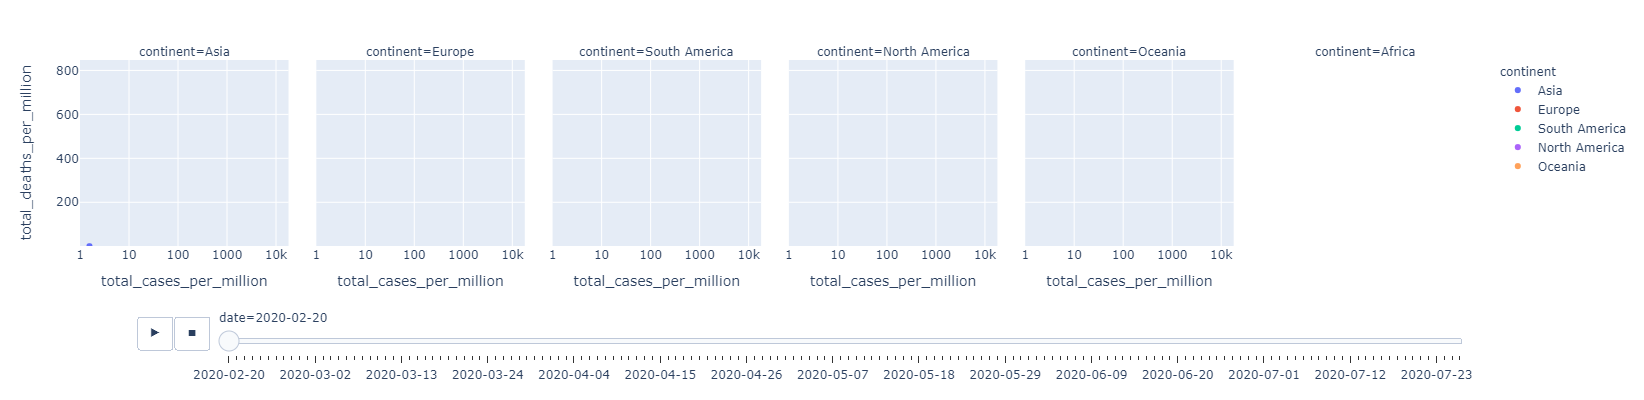

In [172]:
fig = px.scatter(df_nonan_pop, x="total_cases_per_million", y="total_deaths_per_million", animation_frame="date",
animation_group="location", color="continent", hover_name="location",
facet_col="continent", width=1200, height=400, log_x=True, size_max=45,
range_x=[xmin,xmax], range_y=[ymin,ymax])
fig.show()

 ### Conclusions: 
In this exploratory data analysis of Covid Data we have extracted some valuable information on the factors driving the spread and negative impact of this virus
* Older people seem to be more susceptible to the virus.
* Countries with higher testing rates are controlling better the stread of covid. Scaling-up testing quickly at the beginnnig seems to be a critical factor in order to be able to control the pandemia.
* The GDP per capita, hadwashing facilies and number of beds at hospitals seem to be critical also factors for Covid control. In fact, these variables undoubdtely greatly contribute a stronger health-care system which in turn allowed a quicker and more effective response.
* The larger percentage of men death rates compared to women remains a matter of discussion. The higher rate of male smokers may make men more susceptible to the disease.
* The pandemia seems to be accelerating in the american continent, where policies have been somewhat more relaxed. The opposite tendecy is taking place in Europe. This comes to show the importance of following the advices from health authorities from the use of the mask, practicing social distancing and washing hands.
* Currently, the most affected countries seem to be USA, Colombia, South Africa, India, Mexico, Brazil and Peru as the recovery rates and increases in cases per million in last 2 weeks show.

Forecast: The low testing rates of highly populated countries such as India will make very difficult to control this virus, since it has been shown that most of the people (in particular of young age) remain assimptomatic but infectious. Hence, the countries at highest risk in the weeks to come are those:

* High populated.
* With low median-age.
* With low testing rates.

Hence, it is expected that the health impact in the coming weeks will be greatest in Colombia, South Africa, India, Brazil, Mexico, Peru and USA.